In [1]:
import numpy as np 
import pandas as pd

In [4]:
Tran_Data = pd.read_csv('Tran_Data.csv')#Tran_Data

In [5]:
Tran_Data.head(5)

TranId       TranDate       TranType  TranAmout Fraud
0  258993  1/2/2008 1:04           Cash       2357     N
1  223712  1/2/2008 1:53       Transfer        421     N
2   22385  1/2/2008 2:04  Extra Payment       7225     N
3   72385  1/2/2008 2:04        Deposit      14449     N
4  122385  1/2/2008 2:04           Cash       1937     N

In [66]:
TranDate=pd.to_datetime(Tran_Data['TranDate']).dt.date
TranTime=pd.to_datetime(Tran_Data['TranDate']).dt.time

In [7]:
Tran_Data['TranDate']=TranDate
Tran_Data['TranTime']=TranTime

In [8]:
Tran_Data.head(25)

TranId    TranDate       TranType  TranAmout Fraud  TranTime
0   258993  2008-01-02           Cash       2357     N  01:04:00
1   223712  2008-01-02       Transfer        421     N  01:53:00
2    22385  2008-01-02  Extra Payment       7225     N  02:04:00
3    72385  2008-01-02        Deposit      14449     N  02:04:00
4   122385  2008-01-02           Cash       1937     N  02:04:00
5   219311  2008-01-02       Transfer       1655     N  02:21:00
6   295645  2008-01-02         Refund        178     N  02:23:00
7   185950  2008-01-02        Payment       2471     N  02:27:00
8   285776  2008-01-02         Retail       2014     N  02:56:00
9   288712  2008-01-02         Retail        795     N  02:57:00
10  184467  2008-01-02         Retail        690     N  03:17:00
11  253640  2008-01-02           Cash        638     N  03:21:00
12   68574  2008-01-02      Withdrawl      15317     N  03:39:00
13  118574  2008-01-02         Retail       2053     N  03:39:00
14   18574  2008-01-02            EMI       7659     N  03:39:00
15   77796  2008-01-02      Withdrawl      19690     N  04:06:00
16   27796  2008-01-02            EMI       9845     N  04:06:00
17  127796  2008-01-02        Payment       2640     N  04:06:00
18  205968  2008-01-02           Cash        909     N  04:12:00
19  223389  2008-01-02       Transfer        276     N  04:21:00
20  212978  2008-01-02         Retail       2088     N  04:35:00
21  162710  2008-01-02           Cash       1075     N  04:38:00
22    9676  2008-01-02            EMI       8325     N  04:53:00
23   59676  2008-01-02      Withdrawl      16650     N  04:53:00
24  109676  2008-01-02         Retail       2232     N  04:53:00

Lets perfrom one hot encoding to change the categorical to continuos variables which can be helpful for training

In [9]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder() 

In [10]:
c1=le.fit_transform(Tran_Data['TranDate']) 
c2=le.fit_transform(Tran_Data['TranTime']) 

In [11]:
Tran_Data['TranDate']=c1
Tran_Data['TranTime']=c2

In [12]:
Tran_Data.head(5)

TranId  TranDate       TranType  TranAmout Fraud  TranTime
0  258993         0           Cash       2357     N        64
1  223712         0       Transfer        421     N       113
2   22385         0  Extra Payment       7225     N       124
3   72385         0        Deposit      14449     N       124
4  122385         0           Cash       1937     N       124

In [13]:
new_col=pd.get_dummies(Tran_Data.TranType)
new_col

Cash  Deposit  EMI  Extra Payment  Payment  Refund  Retail  Transfer  \
0          1        0    0              0        0       0       0         0   
1          0        0    0              0        0       0       0         1   
2          0        0    0              1        0       0       0         0   
3          0        1    0              0        0       0       0         0   
4          1        0    0              0        0       0       0         0   
...      ...      ...  ...            ...      ...     ...     ...       ...   
299995     0        0    0              0        0       0       0         0   
299996     0        0    0              0        0       0       1         0   
299997     1        0    0              0        0       0       0         0   
299998     0        0    0              0        0       0       0         1   
299999     1        0    0              0        0       0       0         0   

        Withdrawl  
0               0  
1               0  
2               0  
3               0  
4               0  
...           ...  
299995          1  
299996          0  
299997          0  
299998          0  
299999          0  

[300000 rows x 9 columns]

In [14]:
new_col=pd.DataFrame(new_col)

In [15]:
Tran_Data=pd.concat([Tran_Data, new_col], axis=1)

In [16]:
Temp = Tran_Data.pop('Fraud')
new_df = pd.concat([Tran_Data, Temp], 1)
Tran_Data=new_df


In [17]:
Tran_Data=Tran_Data.drop(['TranType'], axis = 1) 

In [18]:
Tran_Data.head()

TranId  TranDate  TranAmout  TranTime  Cash  Deposit  EMI  Extra Payment  \
0  258993         0       2357        64     1        0    0              0   
1  223712         0        421       113     0        0    0              0   
2   22385         0       7225       124     0        0    0              1   
3   72385         0      14449       124     0        1    0              0   
4  122385         0       1937       124     1        0    0              0   

   Payment  Refund  Retail  Transfer  Withdrawl Fraud  
0        0       0       0         0          0     N  
1        0       0       0         1          0     N  
2        0       0       0         0          0     N  
3        0       0       0         0          0     N  
4        0       0       0         0          0     N

In [19]:
Tran_Data.shape

(300000, 14)

In [20]:
Tran_Data.describe()

TranId       TranDate      TranAmout       TranTime  \
count  300000.000000  300000.000000  300000.000000  300000.000000   
mean   150000.500000    1832.077717    3390.753000     719.108253   
std     86602.684716    1057.308565    4228.841578     415.850545   
min         1.000000       0.000000       0.000000       0.000000   
25%     75000.750000     916.000000     908.000000     359.000000   
50%    150000.500000    1832.000000    1825.000000     716.000000   
75%    225000.250000    2748.000000    3318.250000    1079.000000   
max    300000.000000    3668.000000   20000.000000    1439.000000   

                Cash        Deposit            EMI  Extra Payment  \
count  300000.000000  300000.000000  300000.000000  300000.000000   
mean        0.222717       0.082990       0.083677       0.082990   
std         0.416070       0.275868       0.276903       0.275868   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

             Payment         Refund         Retail       Transfer  \
count  300000.000000  300000.000000  300000.000000  300000.000000   
mean        0.111203       0.110570       0.111393       0.110783   
std         0.314384       0.313599       0.314619       0.313864   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

           Withdrawl  
count  300000.000000  
mean        0.083677  
std         0.276903  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000

In [21]:
Tran_Data.isnull().sum()

TranId           0
TranDate         0
TranAmout        0
TranTime         0
Cash             0
Deposit          0
EMI              0
Extra Payment    0
Payment          0
Refund           0
Retail           0
Transfer         0
Withdrawl        0
Fraud            0
dtype: int64

There are no nulls so we can proceed for viewing **Data** **Distribution**

In [22]:
import seaborn as sns

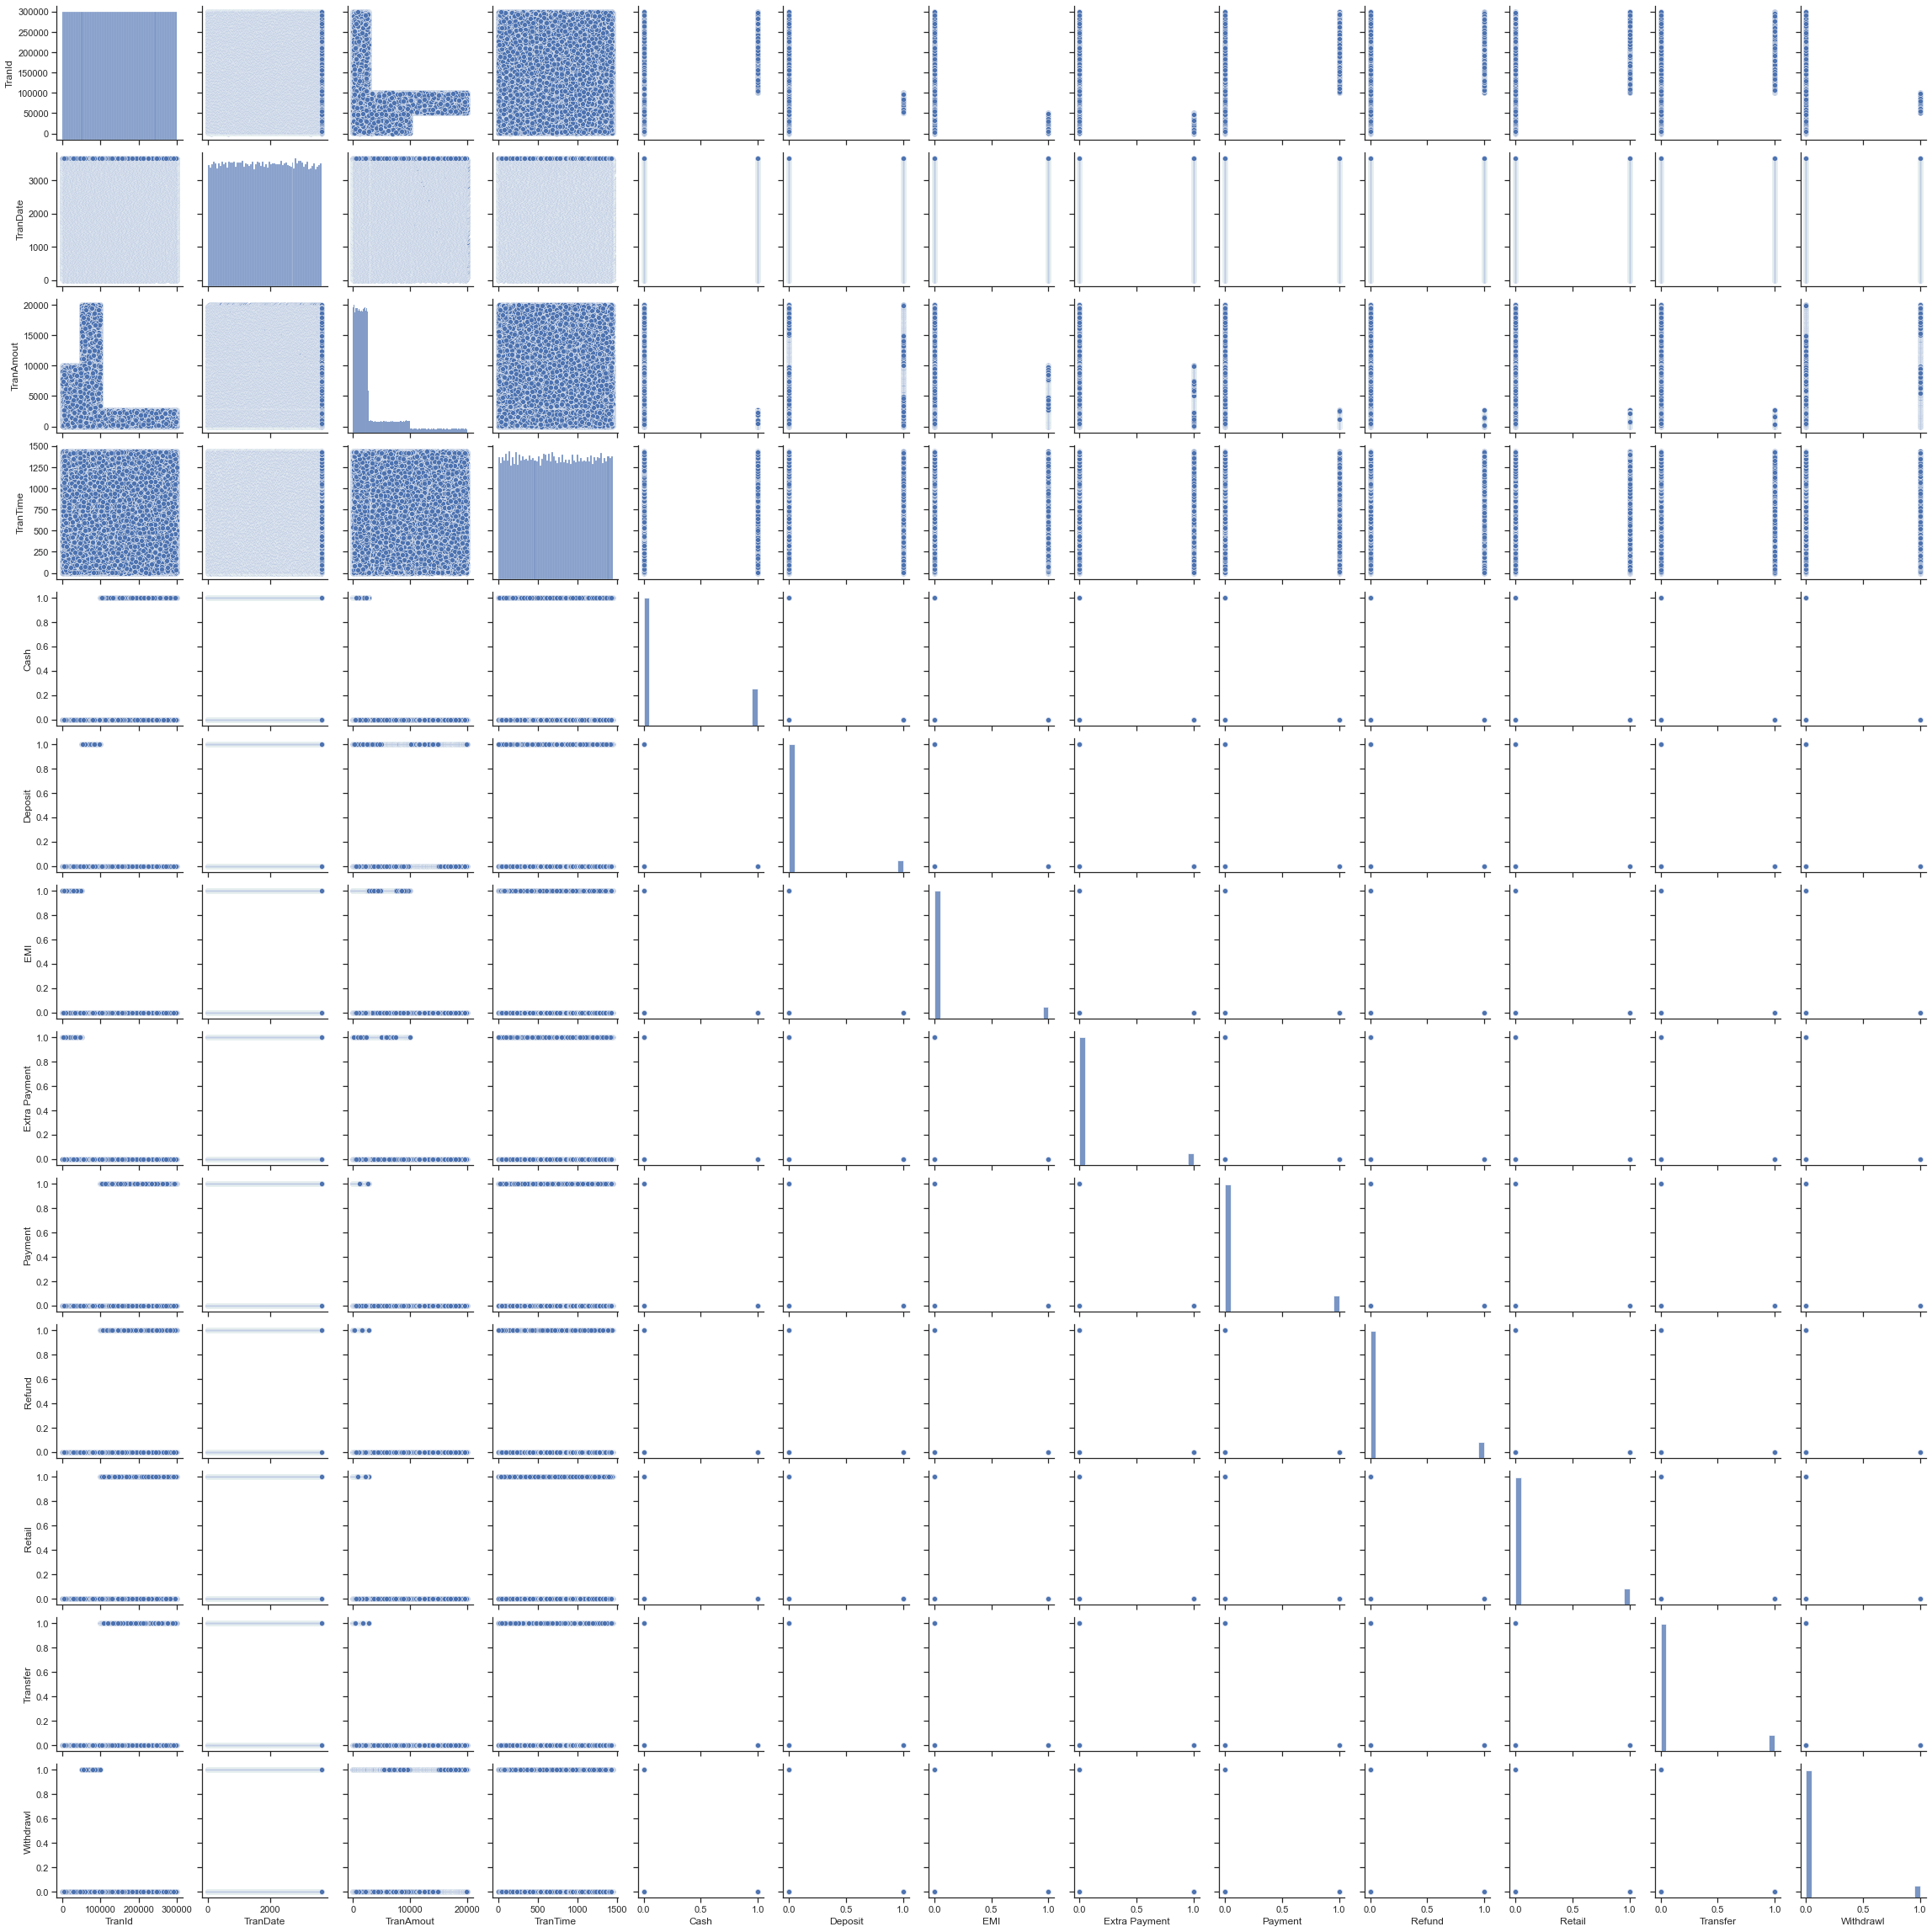

In [23]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(Tran_Data)

Plot scatterplots and distributions of numerical features to see how they may affect the output 'area'

In [24]:
Tran_Data['Fraud']=np.log10(Tran_Data['TranId']+1)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

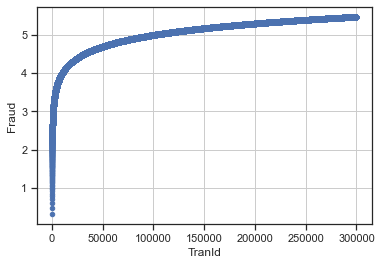

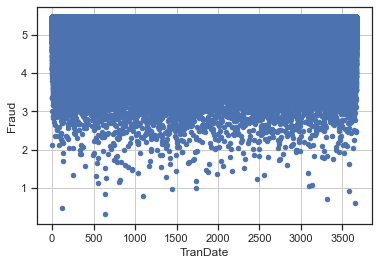

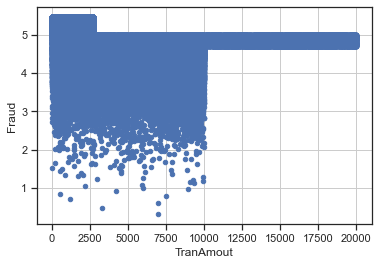

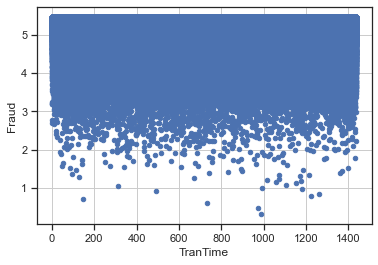

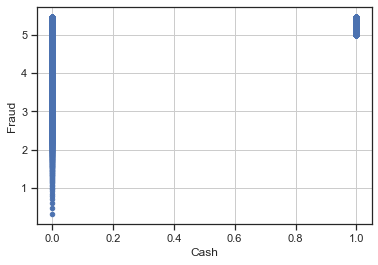

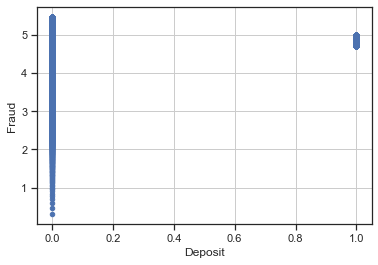

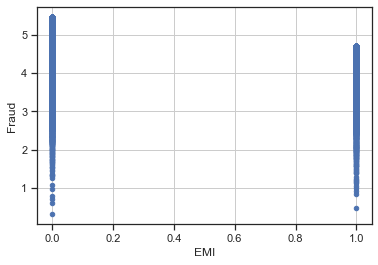

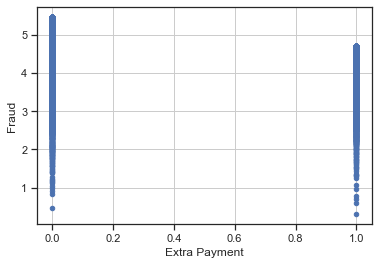

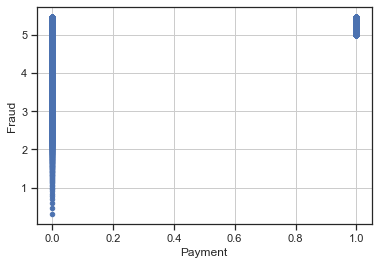

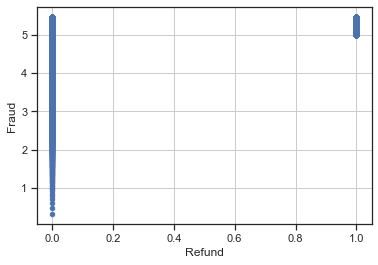

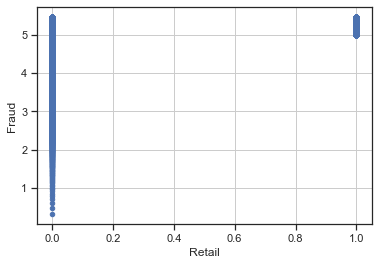

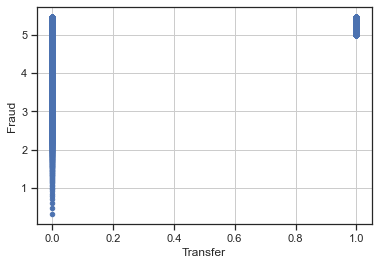

In [25]:
for i in Tran_Data.describe().columns[:-2]:Tran_Data.plot.scatter(i,'Fraud',grid=True)

Plot boxplots of how the categorical features (month and day) affect the outcome

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
test_size=0.3

In [28]:
X_data=Tran_Data.drop(['TranId','TranDate','TranAmout','TranTime','Cash','Deposit','EMI','Extra Payment','Payment','Refund','Retail','Transfer','Withdrawl'],axis=1)

In [29]:
y_data=Tran_Data['Fraud']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=test_size)

In [31]:
#y_train=y_train.reshape(y_train.size,1)
y_train=y_train.values.reshape(-1,1)

In [32]:
y_train.shape

(210000, 1)

In [33]:
X_train

Fraud
253936  4.885695
294377  5.302511
251191  5.324980
93179   5.144490
77975   5.297454
...          ...
155502  5.426687
12058   4.654196
87504   5.107993
175198  5.181114
127661  5.323493

[210000 rows x 1 columns]

In [34]:
y_train

array([[4.88569473],
       [5.30251058],
       [5.32497965],
       ...,
       [5.10799303],
       [5.18111439],
       [5.32349342]])

In [35]:
X_test

Fraud
138938  5.429285
295393  5.433696
179330  5.197975
138824  5.135231
91676   5.311124
...          ...
154093  4.244104
114445  5.085701
211518  5.269144
247828  4.944004
275401  5.145812

[90000 rows x 1 columns]

In [36]:
y_test

138938    5.429285
295393    5.433696
179330    5.197975
138824    5.135231
91676     5.311124
            ...   
154093    4.244104
114445    5.085701
211518    5.269144
247828    4.944004
275401    5.145812
Name: Fraud, Length: 90000, dtype: float64

In [37]:
#SVR
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [38]:
scaler = StandardScaler()

In [39]:
#Linear Regression
from sklearn.linear_model import LinearRegression

In [40]:
model=LinearRegression()

In [41]:
model.fit(scaler.fit_transform(X_train),scaler.fit_transform(y_train))

LinearRegression()

In [42]:
predicted=model.predict(X_test)

In [43]:
predicted

array([[5.42928545],
       [5.43369625],
       [5.19797487],
       ...,
       [5.26914387],
       [4.9440037 ],
       [5.14581151]])

In [44]:
y_test

138938    5.429285
295393    5.433696
179330    5.197975
138824    5.135231
91676     5.311124
            ...   
154093    4.244104
114445    5.085701
211518    5.269144
247828    4.944004
275401    5.145812
Name: Fraud, Length: 90000, dtype: float64

In [45]:
#train
from sklearn.metrics import mean_squared_error
import math
print(mean_squared_error(X_train,y_train))
print(math.sqrt(mean_squared_error(X_train,y_train)))

0.0
0.0


In [46]:
#test
from sklearn.metrics import mean_squared_error
import math
mae=mean_squared_error(y_test,predicted)
mse=math.sqrt(mean_squared_error(y_test, predicted))
print(mse)
print(round(mse,2))
#np.array([6.5]).reshape(1, 1) for testing single values

9.03987760108018e-15
0.0


In [47]:
temp=y_test.to_numpy()
print("Actual","  ","predicted")
for i in range(len(temp)):
    print(temp[i],"   ",predicted[i])

''' 
so the error difference is almost negligible

for example consider the first elements of actual and predicted below

Actual[0]=5.364856676090442

Predicted[0]=5.36485668

Differecne(actual-predicted)= 0.000000003909558
'''

Actual    predicted
5.429285445151139     [5.42928545]
5.433696245568521     [5.43369625]
5.197974873991973     [5.19797487]
5.135231271159854     [5.13523127]
5.311124207459274     [5.31112421]
4.923865475185502     [4.92386548]
3.708250888591378     [3.70825089]
5.370624100841535     [5.3706241]
4.922159520731527     [4.92215952]
5.454701595394103     [5.4547016]
5.464550648399029     [5.46455065]
5.33334851417502     [5.33334851]
4.846473194491259     [4.84647319]
5.343637006108385     [5.34363701]
4.252343224380086     [4.25234322]
5.2373904011032275     [5.2373904]
5.265617227204769     [5.26561723]
5.460192480942941     [5.46019248]
5.413410419619198     [5.41341042]
4.101884487167542     [4.10188449]
5.264243891992797     [5.26424389]
5.332323306113294     [5.33232331]
4.7064873488959345     [4.70648735]
5.439343748458199     [5.43934375]
4.823878339266514     [4.82387834]
5.370596350690927     [5.37059635]
5.4770256994221755     [5.4770257]
5.1513269397102315     [5.15132694]
5

5.264997168476743     [5.26499717]
5.4274471571712875     [5.42744716]
4.840250416905711     [4.84025042]
5.254949076586777     [5.25494908]
5.173349462518568     [5.17334946]
4.130751776765143     [4.13075178]
4.67089495352021     [4.67089495]
3.90655051910145     [3.90655052]
5.446631906250883     [5.44663191]
4.944013578266628     [4.94401358]
4.3151933756957135     [4.31519338]
5.301667939778248     [5.30166794]
5.468062138714816     [5.46806214]
4.699291263401427     [4.69929126]
5.232709025605414     [5.23270903]
5.02615723072851     [5.02615723]
4.98468929972488     [4.9846893]
5.159979036289231     [5.15997904]
5.328367369619052     [5.32836737]
4.925647225120574     [4.92564723]
5.262387008767994     [5.26238701]
4.71568585857204     [4.71568586]
5.134960808577622     [5.13496081]
5.271497750750362     [5.27149775]
4.657400090872144     [4.65740009]
5.30253006095235     [5.30253006]
5.4718811297594945     [5.47188113]
5.062232151706837     [5.06223215]
3.8978469315795716     [

5.170804244487251     [5.17080424]
5.179402404939503     [5.1794024]
5.260960542221719     [5.26096054]
5.088593186745559     [5.08859319]
4.8133073836027735     [4.81330738]
4.8596305790065495     [4.85963058]
5.431170701483257     [5.4311707]
5.46527575193322     [5.46527575]
5.043625526096857     [5.04362553]
5.211192650591151     [5.21119265]
5.11655793671921     [5.11655794]
5.274229455748089     [5.27422946]
5.449688167522854     [5.44968817]
5.35908952446184     [5.35908952]
5.2613247364761575     [5.26132474]
5.3632113418005325     [5.36321134]
5.397202819917811     [5.39720282]
5.447677323082952     [5.44767732]
5.333354561370786     [5.33335456]
5.403804896674735     [5.4038049]
5.206788109652253     [5.20678811]
5.311073286473117     [5.31107329]
5.21121134364918     [5.21121134]
4.936840345812756     [4.93684035]
4.594657687430001     [4.59465769]
5.187954798315782     [5.1879548]
5.197167488971484     [5.19716749]
5.183705343653634     [5.18370534]
5.1143907791385645     [

5.4634973172602415     [5.46349732]
4.525070734291675     [4.52507073]
5.313384168155136     [5.31338417]
5.197536922995609     [5.19753692]
4.419360869721284     [4.41936087]
5.476026902635505     [5.4760269]
5.01627684137414     [5.01627684]
4.8509891250467305     [4.85098913]
4.839955445967566     [4.83995545]
5.46175806547517     [5.46175807]
5.382632907408125     [5.38263291]
5.1596333549430495     [5.15963335]
4.099991233544684     [4.09999123]
4.345569756056392     [4.34556976]
4.794404386374087     [4.79440439]
5.209807126766063     [5.20980713]
5.235159645042988     [5.23515965]
5.072889284800773     [5.07288928]
4.767482392142532     [4.76748239]
4.956317333363374     [4.95631733]
4.861701644756823     [4.86170164]
5.017333900680851     [5.0173339]
5.357271470085229     [5.35727147]
5.308818300237215     [5.3088183]
5.181423376238319     [5.18142338]
5.454353906037792     [5.45435391]
4.501812117075093     [4.50181212]
4.94507448847873     [4.94507449]
5.355123807822453     [

5.400036923514113     [5.40003692]
4.259331024917654     [4.25933102]
5.235210184362729     [5.23521018]
4.780965029608317     [4.78096503]
5.384036046354731     [5.38403605]
5.361669296729252     [5.3616693]
5.399150869289575     [5.39915087]
5.392399702701046     [5.3923997]
5.0998808261253945     [5.09988083]
4.542115540921006     [4.54211554]
5.226280188052154     [5.22628019]
5.081941085698     [5.08194109]
5.089124091853771     [5.08912409]
5.26145320274181     [5.2614532]
4.879835328736852     [4.87983533]
5.408070285887185     [5.40807029]
5.393734853912796     [5.39373485]
4.215981056791863     [4.21598106]
5.417141071777271     [5.41714107]
4.9466978372457415     [4.94669784]
5.216675140602792     [5.21667514]
5.081286084532139     [5.08128608]
5.3625107482111565     [5.36251075]
5.088625059360618     [5.08862506]
2.584331224367531     [2.58433122]
5.472613123113183     [5.47261312]
5.122884013683924     [5.12288401]
5.452008896912284     [5.4520089]
5.28009783136443     [5.2

2.8254261177678233     [2.82542612]
5.475035985935979     [5.47503599]
4.533110838105354     [4.53311084]
4.423688137388436     [4.42368814]
5.309018744503924     [5.30901874]
4.512337462332936     [4.51233746]
5.072010804365697     [5.0720108]
4.971118063536229     [4.97111806]
4.988951160780394     [4.98895116]
5.382814618701194     [5.38281462]
5.172416097702181     [5.1724161]
5.231410966913842     [5.23141097]
4.734359713534696     [4.73435971]
5.129986193861085     [5.12998619]
4.352491239988165     [4.35249124]
5.436242180871562     [5.43624218]
4.580628505568549     [4.58062851]
4.925564754682138     [4.92556475]
4.800916313271131     [4.80091631]
5.316006010689005     [5.31600601]
5.416756969168746     [5.41675697]
5.407339907995509     [5.40733991]
4.224092588494267     [4.22409259]
5.446602399542859     [5.4466024]
5.278142873700906     [5.27814287]
5.238159055211882     [5.23815906]
5.294274388773439     [5.29427439]
5.389809073031001     [5.38980907]
5.459273342028182     

5.436137193138398     [5.43613719]
4.8248739727439425     [4.82487397]
4.754149493427984     [4.75414949]
5.0339060370266875     [5.03390604]
5.006234927543091     [5.00623493]
5.262064086746944     [5.26206409]
5.134792081908558     [5.13479208]
5.3994764273872065     [5.39947643]
4.959599412290381     [4.95959941]
5.093186962628359     [5.09318696]
5.1321571890628075     [5.13215719]
5.336291587308943     [5.33629159]
4.8041326144720715     [4.80413261]
5.2770060545013795     [5.27700605]
5.4099162243845464     [5.40991622]
5.4518140576164384     [5.45181406]
5.150452480839567     [5.15045248]
5.47010899715236     [5.470109]
5.457450414421263     [5.45745041]
5.4607114618838954     [5.46071146]
4.481557278577391     [4.48155728]
5.2683790306834455     [5.26837903]
5.284146375292501     [5.28414638]
5.295692422564738     [5.29569242]
4.606112535339159     [4.60611254]
5.317532670508367     [5.31753267]
3.7378285058957847     [3.73782851]
5.448697046614292     [5.44869705]
4.2774258322

5.461938001251045     [5.461938]
5.03503729494177     [5.03503729]
5.078724997269078     [5.078725]
5.1232700154482576     [5.12327002]
5.295835290184618     [5.29583529]
4.396216788290972     [4.39621679]
5.14387316713148     [5.14387317]
4.9577939887621     [4.95779399]
4.874800608498268     [4.87480061]
5.352801670015462     [5.35280167]
2.6693168805661123     [2.66931688]
5.1239789718089215     [5.12397897]
5.426581198290112     [5.4265812]
4.423147531977245     [4.42314753]
5.256566221472175     [5.25656622]
5.389835622340028     [5.38983562]
4.601842789782098     [4.60184279]
5.312149841785238     [5.31214984]
5.02679057823711     [5.02679058]
4.975633972635591     [4.97563397]
5.43694303920821     [5.43694304]
5.2686271080261635     [5.26862711]
3.0453229787866576     [3.04532298]
5.347433452919437     [5.34743345]
5.258105461228946     [5.25810546]
4.789742837306644     [4.78974284]
5.167565432145328     [5.16756543]
2.846337112129805     [2.84633711]
3.9929509605704463     [3.

4.7039273042203895     [4.7039273]
4.443153421877831     [4.44315342]
5.252882144717895     [5.25288214]
5.344301868139557     [5.34430187]
4.313677438601324     [4.31367744]
5.4602361293103066     [5.46023613]
4.919459894345338     [4.91945989]
5.074893203087415     [5.0748932]
5.433867399257333     [5.4338674]
5.4766867429456445     [5.47668674]
5.2149577030168865     [5.2149577]
4.629725520059476     [4.62972552]
5.339783246689764     [5.33978325]
5.453724918447377     [5.45372492]
5.35739545367443     [5.35739545]
4.695788026215534     [4.69578803]
5.442633391202302     [5.44263339]
5.1438762853718165     [5.14387629]
3.7283537820212285     [3.72835378]
5.4340928352738604     [5.43409284]
5.440907508531636     [5.44090751]
5.213562910650085     [5.21356291]
5.0218381877231195     [5.02183819]
5.294946550280256     [5.29494655]
4.812518971865254     [4.81251897]
4.57189508440376     [4.57189508]
4.953624406532067     [4.95362441]
5.444505403632224     [5.4445054]
5.265475846864448  

5.4748410236532274     [5.47484102]
5.060104528882185     [5.06010453]
4.856178878857711     [4.85617888]
5.32323972105516     [5.32323972]
4.4815859363676225     [4.48158594]
5.068044785926521     [5.06804479]
5.39954566359245     [5.39954566]
5.2244035577648384     [5.22440356]
5.350063791873644     [5.35006379]
5.455336781718322     [5.45533678]
3.943247125137862     [3.94324713]
5.345218807832759     [5.34521881]
5.347813813302119     [5.34781381]
4.652401073162046     [4.65240107]
5.390138169803945     [5.39013817]
3.9189734304929544     [3.91897343]
5.46922684573227     [5.46922685]
5.457373156556446     [5.45737316]
5.158627813216547     [5.15862781]
5.385500814809866     [5.38550081]
4.8344970005485175     [4.834497]
4.801053663477656     [4.80105366]
5.4076882646205915     [5.40768826]
5.288101602978643     [5.2881016]
4.541978411697019     [4.54197841]
3.769820257763592     [3.76982026]
5.384272749396695     [5.38427275]
5.091371466514611     [5.09137147]
4.4334978148237205  

5.1399325831510865     [5.13993258]
4.867973967520535     [4.86797397]
5.081451727588121     [5.08145173]
4.895168304381695     [4.8951683]
5.4676258617241675     [5.46762586]
5.449344155990898     [5.44934416]
4.464295755807204     [4.46429576]
5.361038082107575     [5.36103808]
4.730289580621105     [4.73028958]
5.390265495181802     [5.3902655]
5.426794192553753     [5.42679419]
4.377324467736556     [4.37732447]
4.9921380222807255     [4.99213802]
2.705007959333336     [2.70500796]
5.3241959994499535     [5.324196]
4.9394194033293175     [4.9394194]
5.277636714930903     [5.27763671]
5.1443126181878345     [5.14431262]
5.4348625921533475     [5.43486259]
5.340509551544339     [5.34050955]
5.303366716741229     [5.30336672]
5.409366650349625     [5.40936665]
5.466162988018487     [5.46616299]
4.372948806027788     [4.37294881]
5.10152368468927     [5.10152368]
4.744934169885334     [4.74493417]
5.454751895801824     [5.4547519]
5.311622493590024     [5.31162249]
4.72029163965499    

5.142170386276096     [5.14217039]
4.624055089282426     [4.62405509]
4.252148854818508     [4.25214885]
5.144655143841811     [5.14465514]
5.14015279448004     [5.14015279]
4.947605249035348     [4.94760525]
5.200880580420108     [5.20088058]
5.165902838077654     [5.16590284]
5.071731082154407     [5.07173108]
4.664876919831211     [4.66487692]
5.368510019595464     [5.36851002]
5.19378667091905     [5.19378667]
5.476499769142371     [5.47649977]
5.116072847355188     [5.11607285]
5.469480334757756     [5.46948033]
5.297532911792758     [5.29753291]
4.743423524410048     [4.74342352]
5.461638066860941     [5.46163807]
4.535319442597916     [4.53531944]
5.299258810310493     [5.29925881]
5.434377261250224     [5.43437726]
4.875408560077064     [4.87540856]
4.849671194740993     [4.84967119]
5.3589812256253495     [5.35898123]
4.415640979896154     [4.41564098]
5.209504291089702     [5.20950429]
4.475351522928022     [4.47535152]
5.302889133984863     [5.30288913]
5.1612571681222255   

5.2491151606205495     [5.24911516]
4.969042967305813     [4.96904297]
3.801815168581437     [3.80181517]
5.2130101194741565     [5.21301012]
4.419972261274     [4.41997226]
5.437579347308378     [5.43757935]
3.5689054149828787     [3.56890541]
5.339932178634292     [5.33993218]
5.371815683016117     [5.37181568]
5.340985158476819     [5.34098516]
5.232864024149608     [5.23286402]
5.473403752729314     [5.47340375]
5.087419354860766     [5.08741935]
5.157840421862666     [5.15784042]
5.442263351835092     [5.44226335]
5.435852325854346     [5.43585233]
5.2323505384251625     [5.23235054]
5.422271306098495     [5.42227131]
4.941551183170508     [4.94155118]
3.7298934039632377     [3.7298934]
5.396138297395892     [5.3961383]
4.323107655185521     [4.32310766]
5.37983468996462     [5.37983469]
5.127878708263383     [5.12787871]
4.92594604924737     [4.92594605]
4.249907329935918     [4.24990733]
4.2949949938591     [4.29499499]
4.393487458147175     [4.39348746]
5.078308160946427     [5

5.10170240528643     [5.10170241]
5.115796835615214     [5.11579684]
5.3987175678984345     [5.39871757]
4.71439682707328     [4.71439683]
4.838578359084253     [4.83857836]
5.005652315355074     [5.00565232]
5.004716788693626     [5.00471679]
4.204906428902569     [4.20490643]
4.682974950184588     [4.68297495]
5.369002369623937     [5.36900237]
5.464252513568051     [5.46425251]
5.239089164600075     [5.23908916]
4.609039181902239     [4.60903918]
5.421268205952203     [5.42126821]
5.453617961029337     [5.45361796]
5.313799751908259     [5.31379975]
4.6345377245814365     [4.63453772]
4.886733185566098     [4.88673319]
5.120146006188111     [5.12014601]
5.385452545466035     [5.38545255]
5.241304861993719     [5.24130486]
5.445099568223968     [5.44509957]
5.455752120505773     [5.45575212]
5.247929098575416     [5.2479291]
5.435242177002846     [5.43524218]
4.239924813262151     [4.23992481]
5.43829071734985     [5.43829072]
5.388859310958847     [5.38885931]
5.249359811521532     

5.475578219020196     [5.47557822]
5.385888562609525     [5.38588856]
5.291335544382936     [5.29133554]
5.0965867776550535     [5.09658678]
4.940884881296356     [4.94088488]
5.241466786224015     [5.24146679]
5.3173131117760475     [5.31731311]
4.887561040930009     [4.88756104]
5.383626891533225     [5.38362689]
5.271332696225809     [5.2713327]
5.368738613739662     [5.36873861]
4.81205059272188     [4.81205059]
4.689797054903497     [4.68979705]
5.27468422770439     [5.27468423]
5.156473430909324     [5.15647343]
4.54130460314287     [4.5413046]
4.9193919267738595     [4.91939193]
4.4489844265948015     [4.44898443]
4.624199561726354     [4.62419956]
4.641741743799373     [4.64174174]
5.448073736852634     [5.44807374]
5.404455681740351     [5.40445568]
5.175987015870342     [5.17598702]
5.167314380353896     [5.16731438]
5.078848159245236     [5.07884816]
4.836779695949838     [4.8367797]
4.695069952343107     [4.69506995]
4.947904034520581     [4.94790403]
5.412129450214663     

4.666349471560198     [4.66634947]
4.579223223940592     [4.57922322]
4.756392652570267     [4.75639265]
4.7724830699613685     [4.77248307]
5.212507212770084     [5.21250721]
3.8519306786402674     [3.85193068]
5.011333567997411     [5.01133357]
4.159326520197866     [4.15932652]
4.32576188531923     [4.32576189]
5.455163225908671     [5.45516323]
5.097729187931864     [5.09772919]
5.263470366061185     [5.26347037]
4.540754799950447     [4.5407548]
5.058957178777311     [5.05895718]
5.102512598776444     [5.1025126]
5.048278621123879     [5.04827862]
5.372506963362899     [5.37250696]
5.087863017766353     [5.08786302]
4.973469610496657     [4.97346961]
5.467611064990804     [5.46761106]
4.961183709812436     [4.96118371]
5.13972485300591     [5.13972485]
5.388960410528105     [5.38896041]
5.35795770400327     [5.3579577]
5.35197014444686     [5.35197014]
5.196217649751929     [5.19621765]
5.25122928022788     [5.25122928]
4.8801788301048195     [4.88017883]
4.9009294353117205     [4

5.261205752337819     [5.26120575]
5.003628530215086     [5.00362853]
4.732433970413424     [4.73243397]
5.30162674040854     [5.30162674]
5.4367016012368135     [5.4367016]
5.432565257200693     [5.43256526]
5.309453433225091     [5.30945343]
5.458660507277104     [5.45866051]
5.145802192610381     [5.14580219]
3.759214431234244     [3.75921443]
4.82006346200954     [4.82006346]
5.415814396213626     [5.4158144]
5.238209246709658     [5.23820925]
3.9503161639246     [3.95031616]
5.215870111719883     [5.21587011]
4.805487265004143     [4.80548727]
5.011134661921079     [5.01113466]
5.359932192176428     [5.35993219]
5.292506383270713     [5.29250638]
5.0791052378623815     [5.07910524]
3.7113853790984517     [3.71138538]
5.10885918903797     [5.10885919]
5.411942781657433     [5.41194278]
5.410682774596905     [5.41068277]
4.46608132511     [4.46608133]
5.4546756807890455     [5.45467568]
5.256236533205923     [5.25623653]
5.330896505368932     [5.33089651]
5.10978434089953     [5.109

5.0425991361575155     [5.04259914]
4.704528000115979     [4.704528]
5.263856118481084     [5.26385612]
5.049090042047978     [5.04909004]
4.315361486979335     [4.31536149]
4.623993157805401     [4.62399316]
4.848460081482247     [4.84846008]
5.126501552928633     [5.12650155]
5.156334070828272     [5.15633407]
5.240611642432826     [5.24061164]
4.91702736496459     [4.91702736]
4.687047135470828     [4.68704714]
5.402629301889556     [5.4026293]
5.072323438293041     [5.07232344]
5.434900884661586     [5.43490088]
5.385137769321136     [5.38513777]
5.001949941084268     [5.00194994]
5.07339938412963     [5.07339938]
4.9455965895825384     [4.94559659]
5.444744102843185     [5.4447441]
4.812686127787285     [4.81268613]
4.310565872283199     [4.31056587]
4.951070253168812     [4.95107025]
5.015782944358066     [5.01578294]
5.11342523071374     [5.11342523]
5.2868806764484955     [5.28688068]
5.416723697546734     [5.4167237]
5.343725581999507     [5.34372558]
5.083524119024941     [5.

5.116182538244427     [5.11618254]
5.280796828361567     [5.28079683]
5.0805254764592265     [5.08052548]
4.610436571618511     [4.61043657]
5.341002983608616     [5.34100298]
4.805351310056281     [4.80535131]
5.356857299125762     [5.3568573]
4.746890963842585     [4.74689096]
5.32454377665769     [5.32454378]
5.1254552397832915     [5.12545524]
4.831569053980177     [4.83156905]
5.393994380229532     [5.39399438]
5.2669768390489     [5.26697684]
4.906722823996352     [4.90672282]
5.464766668244334     [5.46476667]
5.218451473971279     [5.21845147]
5.188889128432452     [5.18888913]
5.270771972426836     [5.27077197]
5.093663281814973     [5.09366328]
4.502631927572243     [4.50263193]
5.1276910241836395     [5.12769102]
5.35309646946214     [5.35309647]
4.4536546351116     [4.45365464]
5.219490218017889     [5.21949022]
5.476109618898533     [5.47610962]
4.46122832178055     [4.46122832]
4.771043353494146     [4.77104335]
4.872144613679529     [4.87214461]
5.4694125556734345     [5

5.076378258906736     [5.07637826]
5.247081680061165     [5.24708168]
3.635282637998212     [3.63528264]
2.576341350205793     [2.57634135]
5.2061455782098385     [5.20614558]
5.453912794126329     [5.45391279]
5.455103835626699     [5.45510384]
5.043161788143642     [5.04316179]
5.4685024078935065     [5.46850241]
5.3729359253123565     [5.37293593]
5.143982292223977     [5.14398229]
4.79964376036374     [4.79964376]
4.14622108881188     [4.14622109]
5.394351851670134     [5.39435185]
5.300247561194085     [5.30024756]
5.231803338784038     [5.23180334]
5.0263943334382635     [5.02639433]
4.61074531052313     [4.61074531]
5.3203332626183855     [5.32033326]
5.0811455985231735     [5.0811456]
5.4574367816790454     [5.45743678]
5.359645792674543     [5.35964579]
5.4506324119070095     [5.45063241]
5.382832605782552     [5.38283261]
5.092011443277139     [5.09201144]
4.828073138354874     [4.82807314]
5.217797049764238     [5.21779705]
5.1377337947537125     [5.13773379]
5.2756821320921

4.788472412291002     [4.78847241]
5.375703841481331     [5.37570384]
5.091403135891569     [5.09140314]
5.477011219512532     [5.47701122]
5.241553951194254     [5.24155395]
5.414170832531062     [5.41417083]
5.469528952367968     [5.46952895]
5.239857320530141     [5.23985732]
4.6785001692461154     [4.67850017]
4.721917733467285     [4.72191773]
5.036856361384705     [5.03685636]
5.464768157663363     [5.46476816]
4.895405969597798     [4.89540597]
5.16635313594777     [5.16635314]
5.327932845598796     [5.32793285]
5.098820176170824     [5.09882018]
5.415399081896504     [5.41539908]
5.370701791831388     [5.37070179]
5.20668558434962     [5.20668558]
5.116886559183162     [5.11688656]
5.435632579873686     [5.43563258]
4.246793918775155     [4.24679392]
4.487760371456292     [4.48776037]
3.6217992240026677     [3.62179922]
4.210532537069397     [4.21053254]
5.256053532456802     [5.25605353]
5.380267334459607     [5.38026733]
5.414891492451062     [5.41489149]
4.979502848787401   

4.396704857597539     [4.39670486]
4.6158133272733535     [4.61581333]
5.2001826810372656     [5.20018268]
4.481055460893371     [4.48105546]
3.508798965403905     [3.50879897]
4.8922560411425655     [4.89225604]
5.263846656263831     [5.26384666]
4.503491066293381     [4.50349107]
5.126258071547405     [5.12625807]
4.438890277816841     [4.43889028]
5.2640051212156225     [5.26400512]
5.152646031232171     [5.15264603]
5.279863062183952     [5.27986306]
4.253459164339838     [4.25345916]
5.065437789646456     [5.06543779]
5.1412396306521835     [5.14123963]
3.725012725341157     [3.72501273]
3.956744545282691     [3.95674455]
5.1077626646905125     [5.10776266]
5.303275994818668     [5.30327599]
5.338749244861668     [5.33874924]
3.693111115462141     [3.69311112]
4.850578849993658     [4.85057885]
5.434816317534086     [5.43481632]
4.906765889540728     [4.90676589]
5.087742386322799     [5.08774239]
4.121494186241665     [4.12149419]
4.888190730370167     [4.88819073]
5.403276701776

5.291644082829655     [5.29164408]
5.033769444957028     [5.03376944]
4.896024394707995     [4.89602439]
4.859318465097116     [4.85931847]
5.1223076440148505     [5.12230764]
5.363218868926729     [5.36321887]
4.978737298959979     [4.9787373]
5.3609699921953275     [5.36096999]
4.779747962914968     [4.77974796]
5.422860574002152     [5.42286057]
4.820661134643595     [4.82066113]
5.410318241015911     [5.41031824]
5.099694449935245     [5.09969445]
5.4281493783000885     [5.42814938]
4.546271144568441     [4.54627114]
5.092899517524429     [5.09289952]
5.188650108778704     [5.18865011]
5.324763823066132     [5.32476382]
5.155357296115192     [5.1553573]
5.022626295072655     [5.0226263]
5.429012219055194     [5.42901222]
5.161496773919578     [5.16149677]
4.790700255300512     [4.79070026]
5.4080261583756695     [5.40802616]
5.1378887367414805     [5.13788874]
5.243752185847552     [5.24375219]
5.280805928393667     [5.28080593]
4.932169245920792     [4.93216925]
5.3525664576915375

5.311772927224242     [5.31177293]
4.549187246134408     [4.54918725]
4.841428301301271     [4.8414283]
5.195941143530572     [5.19594114]
5.308626298783159     [5.3086263]
4.524759505028858     [4.52475951]
4.729933846714294     [4.72993385]
5.276018091683542     [5.27601809]
4.679173423631723     [4.67917342]
4.57234874074516     [4.57234874]
4.296840627340024     [4.29684063]
5.040345167980713     [5.04034517]
5.0316790564971     [5.03167906]
4.670913484999461     [4.67091348]
4.978937930575027     [4.97893793]
5.136054349551055     [5.13605435]
4.410996433516383     [4.41099643]
5.075086876559068     [5.07508688]
5.342171902071366     [5.3421719]
5.119038027379386     [5.11903803]
4.844296958960284     [4.84429696]
5.172862613025721     [5.17286261]
4.698596350387344     [4.69859635]
4.555420953975     [4.55542095]
5.474023849405392     [5.47402385]
5.444063542037886     [5.44406354]
5.446562018693456     [5.44656202]
4.944926609986216     [4.94492661]
5.135011732051602     [5.1350

5.104107962465586     [5.10410796]
4.6930406788594805     [4.69304068]
5.006196396465182     [5.0061964]
5.362620054941136     [5.36262005]
5.321078291192733     [5.32107829]
5.325946460220464     [5.32594646]
5.420299085181487     [5.42029909]
3.5930644316587177     [3.59306443]
5.432295692444013     [5.43229569]
5.472092070370218     [5.47209207]
5.212834567426116     [5.21283457]
5.143458241530768     [5.14345824]
5.146831642889218     [5.14683164]
5.259474419531076     [5.25947442]
5.423195066704859     [5.42319507]
4.112806017266885     [4.11280602]
4.89715956085284     [4.89715956]
5.127380196333354     [5.1273802]
5.452100916578609     [5.45210092]
3.963362766103736     [3.96336277]
5.450007252925498     [5.45000725]
5.399272116249212     [5.39927212]
4.285602311285613     [4.28560231]
5.3742147707133245     [5.37421477]
4.964664971114281     [4.96466497]
5.197707748873808     [5.19770775]
5.429721603844106     [5.4297216]
5.283764681168973     [5.28376468]
5.322628579470073    

4.483230586902103     [4.48323059]
5.444818961842232     [5.44481896]
5.431152999776347     [5.431153]
4.76650951149544     [4.76650951]
5.031892987710475     [5.03189299]
5.305766116072011     [5.30576612]
4.779711903026216     [4.7797119]
4.69569176815691     [4.69569177]
5.007611239610272     [5.00761124]
4.832598317072965     [4.83259832]
5.376905290923814     [5.37690529]
5.386800280988974     [5.38680028]
5.051368650802     [5.05136865]
5.190880523621176     [5.19088052]
5.0376654933508025     [5.03766549]
4.910256112172421     [4.91025611]
5.25237965899037     [5.25237966]
4.106666761969916     [4.10666676]
5.141819628494412     [5.14181963]
5.165796120162599     [5.16579612]
5.3719669370101375     [5.37196694]
4.553470372213122     [4.55347037]
5.222073655912279     [5.22207366]
5.435643729086283     [5.43564373]
4.807176350283643     [4.80717635]
5.444832996468158     [5.444833]
4.709854846624769     [4.70985485]
5.0478314980597     [5.0478315]
5.3989845326816654     [5.398984

4.528646788488089     [4.52864679]
5.355006844736357     [5.35500684]
5.429396949602063     [5.42939695]
5.101135057332041     [5.10113506]
5.350108401239601     [5.3501084]
5.197963861770562     [5.19796386]
4.583946522459128     [4.58394652]
5.119427461105332     [5.11942746]
4.306317781104433     [4.30631778]
4.979120242557178     [4.97912024]
4.494697123110737     [4.49469712]
5.39454273302696     [5.39454273]
5.214218437597243     [5.21421844]
3.0759117614827773     [3.07591176]
5.408965445111856     [5.40896545]
4.115577231128523     [4.11557723]
5.452292561617729     [5.45229256]
5.260207381995193     [5.26020738]
5.344704617550549     [5.34470462]
3.8587176148602915     [3.85871761]
5.186374250735945     [5.18637425]
5.463237321519317     [5.46323732]
5.08649152296693     [5.08649152]
5.45257910479803     [5.4525791]
5.1636324005528875     [5.1636324]
5.44617976779828     [5.44617977]
4.977773889107219     [4.97777389]
5.395607675849097     [5.39560768]
5.273610015624607     [5

5.272447338248604     [5.27244734]
5.3857849588433355     [5.38578496]
5.318180244663059     [5.31818024]
5.243271264235718     [5.24327126]
5.098266365915699     [5.09826637]
5.0598018925402934     [5.05980189]
4.645422269349092     [4.64542227]
4.772358385451197     [4.77235839]
5.251336420843177     [5.25133642]
5.426789315991061     [5.42678932]
4.825757068147706     [4.82575707]
3.780821175853473     [3.78082118]
5.207453934808692     [5.20745393]
5.141625337122731     [5.14162534]
4.949243590568265     [4.94924359]
5.3153026554319815     [5.31530266]
5.1501944092802505     [5.15019441]
5.394483201056038     [5.3944832]
4.05865374157237     [4.05865374]
5.058110818822266     [5.05811082]
5.388577171917381     [5.38857717]
5.1406619985948     [5.140662]
5.471268235047046     [5.47126824]
4.163697945892569     [4.16369795]
4.995086496505733     [4.9950865]
5.15381791201441     [5.15381791]
5.011883259749689     [5.01188326]
5.432826639371717     [5.43282664]
5.226702989585221     [5

4.572104523139882     [4.57210452]
4.869108456508746     [4.86910846]
5.166616580639984     [5.16661658]
5.016648985691003     [5.01664899]
5.073058160988836     [5.07305816]
3.588943642740015     [3.58894364]
5.33480345864807     [5.33480346]
5.374001891152666     [5.37400189]
5.037099658035734     [5.03709966]
5.3755337633581854     [5.37553376]
5.286357653142787     [5.28635765]
5.4087689394335     [5.40876894]
4.505556938663822     [4.50555694]
4.9979147312163175     [4.99791473]
5.134553205684541     [5.13455321]
5.342789701938015     [5.3427897]
4.7834461864111795     [4.78344619]
4.605778955151077     [4.60577896]
5.182982117292908     [5.18298212]
5.325540291841472     [5.32554029]
5.161203238595035     [5.16120324]
5.4437431846092     [5.44374318]
4.999687195349837     [4.9996872]
5.323305738932922     [5.32330574]
5.473786128748754     [5.47378613]
5.449436741946181     [5.44943674]
4.695437894597736     [4.69543789]
5.269667021376841     [5.26966702]
4.788613754287565     [4

4.897748017220548     [4.89774802]
5.297856767218264     [5.29785677]
2.5563025007672873     [2.5563025]
5.451265891074554     [5.45126589]
5.424038352456673     [5.42403835]
5.213081915773124     [5.21308192]
5.343457830749877     [5.34345783]
5.435302752284611     [5.43530275]
5.355771328144981     [5.35577133]
5.388229125456209     [5.38822913]
4.8600204062265     [4.86002041]
5.294267772179458     [5.29426777]
5.424061253883645     [5.42406125]
5.409517218245541     [5.40951722]
5.386372315018712     [5.38637232]
5.429333928864924     [5.42933393]
5.421450909814801     [5.42145091]
5.33933415602267     [5.33933416]
4.244376094020572     [4.24437609]
5.370738782656574     [5.37073878]
5.4498392613320945     [5.44983926]
4.2024883170600935     [4.20248832]
5.201222278771553     [5.20122228]
5.102824600572889     [5.1028246]
5.118354023466007     [5.11835402]
5.261645830916692     [5.26164583]
5.037287023190116     [5.03728702]
5.354425396862814     [5.3544254]
5.425702102203538     [

5.461423486699566     [5.46142349]
5.193224808595702     [5.19322481]
5.382582518536934     [5.38258252]
5.104814757108323     [5.10481476]
5.42871292819292     [5.42871293]
5.129264410315021     [5.12926441]
5.052316799835831     [5.0523168]
4.752785737914157     [4.75278574]
5.407605024299612     [5.40760502]
4.855434347907406     [4.85543435]
4.352626236830803     [4.35262624]
5.268519469224723     [5.26851947]
5.2401422185202     [5.24014222]
5.309962148053286     [5.30996215]
4.6171366923776125     [4.61713669]
4.868509251279585     [4.86850925]
5.0217266644137775     [5.02172666]
5.0574302582902675     [5.05743026]
4.511067457710023     [4.51106746]
5.257452971081367     [5.25745297]
5.319736734148644     [5.31973673]
5.315550534421905     [5.31555053]
5.147097910277923     [5.14709791]
4.633185567059527     [4.63318557]
5.468952557265534     [5.46895256]
5.10943342038445     [5.10943342]
4.5698418994037615     [4.5698419]
4.946943270697825     [4.94694327]
4.725421550074259     

5.469559888013707     [5.46955989]
4.57966929355472     [4.57966929]
5.34887121868672     [5.34887122]
5.209144902321191     [5.2091449]
5.095207721136741     [5.09520772]
5.31346014209635     [5.31346014]
5.29980573273777     [5.29980573]
5.154320484875301     [5.15432048]
4.851197176174161     [4.85119718]
5.401431560708124     [5.40143156]
5.426140244721154     [5.42614024]
4.6652713403106825     [4.66527134]
5.1530889099632535     [5.15308891]
4.962269867528524     [4.96226987]
5.160252380567812     [5.16025238]
4.239899817176968     [4.23989982]
3.7259932589247224     [3.72599326]
5.105278499257996     [5.1052785]
4.671570840733663     [4.67157084]
5.218430463619232     [5.21843046]
5.127914294371593     [5.12791429]
5.325086493219555     [5.32508649]
3.6322547766847135     [3.63225478]
5.430710222448268     [5.43071022]
4.605294269469391     [4.60529427]
5.345873420828132     [5.34587342]
5.385759947334373     [5.38575995]
4.851203293816408     [4.85120329]
5.461686070285481     

4.728548562028337     [4.72854856]
5.184072190881337     [5.18407219]
4.94491181936717     [4.94491182]
5.2511001893826155     [5.25110019]
4.3408801734136455     [4.34088017]
5.416808535146002     [5.41680854]
5.409285423518401     [5.40928542]
5.317465769129422     [5.31746577]
5.437198626554131     [5.43719863]
4.715827920054192     [4.71582792]
5.441984045615038     [5.44198405]
4.438035772093079     [4.43803577]
4.911205564991977     [4.91120556]
5.1010627962136725     [5.1010628]
4.8526019693382345     [4.85260197]
5.409053505010069     [5.40905351]
4.4780900975902895     [4.4780901]
5.322142769440634     [5.32214277]
4.993846081581259     [4.99384608]
4.835481298920491     [4.8354813]
5.170241173953951     [5.17024117]
4.81267275768086     [4.81267276]
5.044488802274189     [5.0444888]
5.457946960371235     [5.45794696]
5.4095290584503     [5.40952906]
5.334650747480265     [5.33465075]
5.0556955257414975     [5.05569553]
5.304585303925294     [5.3045853]
4.9997132710109655     

5.027194620589367     [5.02719462]
4.857869001144397     [4.857869]
5.4604979274309855     [5.46049793]
5.055340099544181     [5.0553401]
4.930592488442598     [4.93059249]
4.84142204440236     [4.84142204]
5.309719571792628     [5.30971957]
5.323169566062373     [5.32316957]
4.546949623822047     [4.54694962]
5.149748567456983     [5.14974857]
5.4094613957890525     [5.4094614]
4.451402613597493     [4.45140261]
5.325369916281268     [5.32536992]
5.0466473163383325     [5.04664732]
4.562221467714351     [4.56222147]
5.048259190559747     [5.04825919]
4.5679199281350344     [4.56791993]
4.226960593532453     [4.22696059]
4.755486102457351     [4.7554861]
5.372576951744309     [5.37257695]
5.4126788998126765     [5.4126789]
5.421972262915818     [5.42197226]
4.704407927386841     [4.70440793]
5.336757833719054     [5.33675783]
5.203511544375016     [5.20351154]
5.2119584069696     [5.21195841]
4.765705799686947     [4.7657058]
4.711849391507308     [4.71184939]
5.459603551836237     [5.

5.243593590152393     [5.24359359]
5.406633841692436     [5.40663384]
5.425105257034592     [5.42510526]
4.974866168131394     [4.97486617]
5.390732035790658     [5.39073204]
4.723808546835584     [4.72380855]
5.029874618265106     [5.02987462]
4.727199542699307     [4.72719954]
5.315384597192658     [5.3153846]
5.330001606894337     [5.33000161]
5.108717203077464     [5.1087172]
5.207497029999842     [5.20749703]
4.535243470502576     [4.53524347]
4.921811284704282     [4.92181128]
5.037454387516411     [5.03745439]
4.51807942810387     [4.51807943]
5.089544815384165     [5.08954482]
5.475354430037121     [5.47535443]
5.032481763248991     [5.03248176]
5.247568226754599     [5.24756823]
5.1419543279334     [5.14195433]
5.000486137633446     [5.00048614]
4.825646779374027     [4.82564678]
5.404474505739853     [5.40447451]
5.256195605522535     [5.25619561]
5.0919481908785595     [5.09194819]
4.7991750724152284     [4.79917507]
5.170739763008588     [5.17073976]
5.023268925463059     [

5.435317097824442     [5.4353171]
5.043794392325779     [5.04379439]
4.742858619037153     [4.74285862]
4.593485442184617     [4.59348544]
4.1902756565569605     [4.19027566]
4.892656594590508     [4.89265659]
4.029180788907547     [4.02918079]
5.243303507594631     [5.24330351]
5.197184037515843     [5.19718404]
5.413049847098995     [5.41304985]
5.419078016603053     [5.41907802]
5.005849462844151     [5.00584946]
4.6292974428542015     [4.62929744]
4.565233707703214     [4.56523371]
5.4290477966827275     [5.4290478]
5.401553895483952     [5.4015539]
3.237292337567459     [3.23729234]
5.208562275566856     [5.20856228]
5.1042002183303845     [5.10420022]
5.2169835593820935     [5.21698356]
4.958764500995247     [4.9587645]
4.446148675696183     [4.44614868]
4.927406296084052     [4.9274063]
5.396031875973676     [5.39603188]
4.912737375708758     [4.91273738]
4.770645856864372     [4.77064586]
5.3994348803653     [5.39943488]
5.337932234876929     [5.33793223]
5.286723611164055     

4.864166831543293     [4.86416683]
5.457904594458721     [5.45790459]
4.672495009537076     [4.67249501]
5.425746099295731     [5.4257461]
4.5082468304512275     [4.50824683]
5.114841079329496     [5.11484108]
5.375189745969823     [5.37518975]
4.6132073521037595     [4.61320735]
4.345726512774175     [4.34572651]
5.02571129062586     [5.02571129]
4.3065751280964495     [4.30657513]
5.0535470748588125     [5.05354707]
5.385999284138968     [5.38599928]
5.260893859219963     [5.26089386]
5.384953447851638     [5.38495345]
5.393766426209555     [5.39376643]
4.8925842997646525     [4.8925843]
5.432059685950968     [5.43205969]
5.010062386878617     [5.01006239]
5.250422442158681     [5.25042244]
5.036672801592131     [5.0366728]
5.470363442308994     [5.47036344]
4.749937188262758     [4.74993719]
4.555771371755518     [4.55577137]
4.980435177535547     [4.98043518]
5.283543189983951     [5.28354319]
5.162017460537803     [5.16201746]
5.368772056451075     [5.36877206]
5.219002632489227  

5.180295085091819     [5.18029509]
5.10817926390026     [5.10817926]
5.330385360631257     [5.33038536]
5.152658254635993     [5.15265825]
5.226027341744499     [5.22602734]
5.005167637970603     [5.00516764]
5.23151546418548     [5.23151546]
5.211918418281408     [5.21191842]
5.275064761950216     [5.27506476]
4.169615662222747     [4.16961566]
5.399597583503795     [5.39959758]
5.25126337329081     [5.25126337]
3.8677620246502005     [3.86776202]
5.256308749121934     [5.25630875]
5.367559041323591     [5.36755904]
5.040780293192532     [5.04078029]
4.830870836339318     [4.83087084]
5.303044784243365     [5.30304478]
5.448982882049478     [5.44898288]
4.7111574096355096     [4.71115741]
5.442354322939399     [5.44235432]
5.046487360230773     [5.04648736]
5.23460079365272     [5.23460079]
4.922886278021724     [4.92288628]
4.399483351504452     [4.39948335]
5.31138084320656     [5.31138084]
4.222170008681765     [4.22217001]
5.347123066174221     [5.34712307]
4.747481724446728     [

4.3542813538497285     [4.35428135]
5.323206708352587     [5.32320671]
5.318883126755936     [5.31888313]
5.235907027040692     [5.23590703]
4.882461922179049     [4.88246192]
4.547663964631684     [4.54766396]
5.053593142444094     [5.05359314]
4.656098202012832     [4.6560982]
5.320075629586756     [5.32007563]
5.205826659359341     [5.20582666]
4.059714845546422     [4.05971485]
5.1319617305082135     [5.13196173]
5.048853372471462     [5.04885337]
5.271248982634803     [5.27124898]
5.357464106281105     [5.35746411]
5.339113414771401     [5.33911341]
5.385214695920387     [5.3852147]
5.3782670477529555     [5.37826705]
5.407678072785382     [5.40767807]
4.774473169118743     [4.77447317]
5.206218518254805     [5.20621852]
5.415255547679083     [5.41525555]
4.9445418900874785     [4.94454189]
4.9706397170107355     [4.97063972]
5.2614365518509585     [5.26143655]
4.66915875743291     [4.66915876]
5.2870758070209005     [5.28707581]
4.933001091904388     [4.93300109]
5.39735418477635

4.326745379565322     [4.32674538]
5.417342132887071     [5.41734213]
5.19685846700859     [5.19685847]
5.053462604925455     [5.0534626]
5.212035707994335     [5.21203571]
5.321256576406336     [5.32125658]
5.337672861671714     [5.33767286]
5.262621926085574     [5.26262193]
3.807264355276107     [3.80726436]
4.544365744223857     [4.54436574]
5.281181138656237     [5.28118114]
5.036501142902965     [5.03650114]
5.09133627560925     [5.09133628]
5.446645882412897     [5.44664588]
5.275889261193048     [5.27588926]
5.423273733443937     [5.42327373]
4.605067897568564     [4.6050679]
5.248137629211972     [5.24813763]
4.607465746402825     [4.60746575]
5.304863051219409     [5.30486305]
5.347138688418376     [5.34713869]
4.370383540607654     [4.37038354]
5.345377651936255     [5.34537765]
5.444806486238425     [5.44480649]
5.318618375960154     [5.31861838]
5.418785044655015     [5.41878504]
3.9308981144101045     [3.93089811]
5.383280244058334     [5.38328024]
5.387638940236929     [

4.498503530678758     [4.49850353]
5.316312191561979     [5.31631219]
5.382298071708763     [5.38229807]
4.679664059513583     [4.67966406]
4.968735046360822     [4.96873505]
5.363495400359654     [5.3634954]
5.335343544824471     [5.33534354]
5.442533072697089     [5.44253307]
4.885191540606848     [4.88519154]
5.350323625523881     [5.35032363]
4.815471485910744     [4.81547149]
5.146062886619651     [5.14606289]
5.440012818895731     [5.44001282]
4.964113426122698     [4.96411343]
4.855301045100613     [4.85530105]
4.669037800885156     [4.6690378]
5.447917382446956     [5.44791738]
5.1046953315418495     [5.10469533]
4.850572723548862     [4.85057272]
5.243729886827177     [5.24372989]
5.375173270215301     [5.37517327]
4.619729690222136     [4.61972969]
5.4490631911233685     [5.44906319]
3.817763632280368     [3.81776363]
4.0604334067027406     [4.06043341]
5.117814652518819     [5.11781465]
4.794920034916988     [4.79492003]
5.3795810577189584     [5.37958106]
5.460121731167997 

4.719944170958677     [4.71994417]
5.330405655619456     [5.33040566]
5.38933090772378     [5.38933091]
5.313656346618031     [5.31365635]
4.863685612188925     [4.86368561]
5.457345885793066     [5.45734589]
5.260111952058718     [5.26011195]
5.383470665004412     [5.38347067]
5.374550394557631     [5.37455039]
5.458618210918124     [5.45861821]
5.153900191017925     [5.15390019]
4.5729993170909475     [4.57299932]
5.448344514759724     [5.44834451]
4.456866853267461     [4.45686685]
4.5058415841733     [4.50584158]
5.115723646457265     [5.11572365]
5.463413657454796     [5.46341366]
5.463316532110292     [5.46331653]
5.433182379423717     [5.43318238]
5.431741596804723     [5.4317416]
5.291912488316212     [5.29191249]
5.347765067762863     [5.34776507]
4.40891802084678     [4.40891802]
4.880647843024314     [4.88064784]
5.212030377330885     [5.21203038]
5.41595774588099     [5.41595775]
4.965568555460146     [4.96556856]
5.452557658913413     [5.45255766]
5.114947748734959     [5.

5.416698742157362     [5.41669874]
5.302549536380859     [5.30254954]
5.317885822579338     [5.31788582]
4.864576338987235     [4.86457634]
5.015368139391645     [5.01536814]
4.234416037567035     [4.23441604]
5.0703519235026695     [5.07035192]
5.103444510075872     [5.10344451]
5.085426162571428     [5.08542616]
5.394707278961395     [5.39470728]
4.483829692568941     [4.48382969]
4.993017165679735     [4.99301717]
5.444786212617859     [5.44478621]
5.384527240529281     [5.38452724]
5.41982197179292     [5.41982197]
5.193742193470952     [5.19374219]
4.868720829893264     [4.86872083]
5.406776849006554     [5.40677685]
4.567602688999889     [4.56760269]
4.544154894561925     [4.54415489]
5.467454188615071     [5.46745419]
5.390945699522543     [5.3909457]
5.398688087699843     [5.39868809]
5.376815935734921     [5.37681594]
5.201006356679015     [5.20100636]
5.3570062171116435     [5.35700622]
5.343422380711428     [5.34342238]
5.335556182545267     [5.33555618]
5.386810974736683   

5.161104350398685     [5.16110435]
5.344712472361874     [5.34471247]
4.653144951600964     [4.65314495]
5.143071036186194     [5.14307104]
5.24920569751751     [5.2492057]
5.147221699973816     [5.1472217]
3.1894903136993675     [3.18949031]
5.32188206860041     [5.32188207]
5.014390314894193     [5.01439031]
5.464726451999592     [5.46472645]
5.074242119704186     [5.07424212]
4.856293773978108     [4.85629377]
5.2148306071604305     [5.21483061]
5.218947548102906     [5.21894755]
5.466677852983189     [5.46667785]
5.30069328694902     [5.30069329]
5.202567322044018     [5.20256732]
4.830171494362252     [4.83017149]
5.395501124305626     [5.39550112]
5.1610294201051055     [5.16102942]
4.999982627873279     [4.99998263]
4.762040529978979     [4.76204053]
5.383305398780534     [5.3833054]
5.440406835458329     [5.44040684]
5.2016128522671305     [5.20161285]
4.645667841581761     [4.64566784]
5.032961065905526     [5.03296107]
5.153884955341434     [5.15388496]
4.089587218672805     

5.462848531848669     [5.46284853]
4.692326864122641     [4.69232686]
5.237744753875185     [5.23774475]
5.473961150455583     [5.47396115]
5.312604668008753     [5.31260467]
5.341517616256365     [5.34151762]
4.562863616239732     [4.56286362]
5.262389382305593     [5.26238938]
5.2572104363295225     [5.25721044]
5.229551304029696     [5.2295513]
5.21049509166437     [5.21049509]
5.165896909992507     [5.16589691]
4.503613661772502     [4.50361366]
5.399346579744564     [5.39934658]
3.880070084064067     [3.88007008]
5.295791335922501     [5.29579134]
5.3623448509633596     [5.36234485]
4.419856658597271     [4.41985666]
4.985413000415408     [4.985413]
4.645942717729486     [4.64594272]
4.627150704625701     [4.6271507]
4.177247836255623     [4.17724784]
5.45777747191848     [5.45777747]
4.058312121108386     [4.05831212]
5.252962197435442     [5.2529622]
4.346411658929061     [4.34641166]
3.8040712488856614     [3.80407125]
5.352786250158746     [5.35278625]
4.5843312243675305     [

5.077596803549411     [5.0775968]
5.3077676544321815     [5.30776765]
5.306682311019055     [5.30668231]
4.577744490294273     [4.57774449]
5.361102379446208     [5.36110238]
5.081617307490729     [5.08161731]
5.344046272413754     [5.34404627]
5.058357686032738     [5.05835769]
5.394943485922346     [5.39494349]
5.201408049830368     [5.20140805]
5.424670969047145     [5.42467097]
5.36584538195687     [5.36584538]
4.933097361397408     [4.93309736]
5.123639339901894     [5.12363934]
4.055263625784184     [4.05526363]
4.429590802223301     [4.4295908]
4.708939024669742     [4.70893902]
5.326747426188595     [5.32674743]
5.159076680873282     [5.15907668]
5.329300228406279     [5.32930023]
5.386436536805701     [5.38643654]
5.354450359460958     [5.35445036]
4.5415667640407795     [4.54156676]
4.972716465104298     [4.97271647]
5.252255768842298     [5.25225577]
3.351216345339342     [3.35121635]
5.437840899356762     [5.4378409]
4.146314122011972     [4.14631412]
4.485394873249012     

4.591443057786914     [4.59144306]
4.559080321020141     [4.55908032]
5.268320501218538     [5.2683205]
5.293649779215835     [5.29364978]
5.187681436455657     [5.18768144]
5.365134040453951     [5.36513404]
4.911583700981076     [4.9115837]
5.107118350992347     [5.10711835]
4.055722266483576     [4.05572227]
4.9427866031449925     [4.9427866]
5.381609587792711     [5.38160959]
5.319998725599524     [5.31999873]
5.250466357111104     [5.25046636]
5.434295787452137     [5.43429579]
4.170906808930748     [4.17090681]
5.1996290380646535     [5.19962904]
4.825068927624623     [4.82506893]
4.757616157261242     [4.75761616]
5.158968272123882     [5.15896827]
5.320239784427078     [5.32023978]
5.362740637345077     [5.36274064]
5.28004997610201     [5.28004998]
5.330770803323406     [5.3307708]
4.878038977795111     [4.87803898]
5.159293417222744     [5.15929342]
4.879250752159977     [4.87925075]
5.15642799231805     [5.15642799]
5.453223518929293     [5.45322352]
4.536166896094166     [4

5.364160611517093     [5.36416061]
5.4152805861327105     [5.41528059]
4.816638944898462     [4.81663894]
5.226339508210119     [5.22633951]
4.67521907955274     [4.67521908]
5.340267584862924     [5.34026758]
4.844967732122525     [4.84496773]
5.327728693646377     [5.32772869]
5.3403568505612045     [5.34035685]
4.89811608436362     [4.89811608]
5.435125784987234     [5.43512578]
5.4219640445368835     [5.42196404]
5.066631501502497     [5.0666315]
5.22774020188568     [5.2277402]
5.431640337744482     [5.43164034]
4.150572247668998     [4.15057225]
4.85533740446954     [4.8553374]
5.2576905717886175     [5.25769057]
5.297944254271984     [5.29794425]
3.452246574520437     [3.45224657]
4.6898059261126965     [4.68980593]
5.380600123024552     [5.38060012]
5.240758857096496     [5.24075886]
5.344519988575578     [5.34451999]
5.386299161970236     [5.38629916]
5.324996087543828     [5.32499609]
5.200275799111851     [5.2002758]
5.230451476044183     [5.23045148]
5.035581814691713     [

5.064663855913281     [5.06466386]
5.3547267723118095     [5.35472677]
5.4465868688912655     [5.44658687]
5.370387242543731     [5.37038724]
5.3317834945984535     [5.33178349]
5.342359506121112     [5.34235951]
5.476647615554123     [5.47664762]
5.292222833262     [5.29222283]
5.168220436685281     [5.16822044]
4.115943176939055     [4.11594318]
4.932362132590618     [4.93236213]
5.4291027745568305     [5.42910277]
4.9379339333457475     [4.93793393]
4.345824456998199     [4.34582446]
4.7207049307178535     [4.72070493]
4.813067002892949     [4.813067]
5.142348788217718     [5.14234879]
5.234879044867968     [5.23487904]
4.448428035011636     [4.44842804]
5.355355723394706     [5.35535572]
5.345242343958815     [5.34524234]
5.472902651803664     [5.47290265]
5.312458752420681     [5.31245875]
5.44004277670934     [5.44004278]
4.72761444656027     [4.72761445]
5.320538843842932     [5.32053884]
5.002938893242647     [5.00293889]
5.185029084122031     [5.18502908]
5.138545835004185    

4.956341345177691     [4.95634135]
5.1408849802658665     [5.14088498]
5.334499993008856     [5.33449999]
5.133344070823265     [5.13334407]
5.202597285692431     [5.20259729]
4.915653055849289     [4.91565306]
5.410549485301887     [5.41054949]
5.28165139901052     [5.2816514]
4.109646031090973     [4.10964603]
4.878217223018997     [4.87821722]
5.2816196100122745     [5.28161961]
2.9242792860618816     [2.92427929]
5.114667685647233     [5.11466769]
5.374361523429842     [5.37436152]
5.291564194622893     [5.29156419]
4.170291058625393     [4.17029106]
5.139646141391116     [5.13964614]
5.283036499835869     [5.2830365]
4.210960255416812     [4.21096026]
4.468110915337237     [4.46811092]
5.1392933381369765     [5.13929334]
5.416437456327288     [5.41643746]
5.0810122749032205     [5.08101227]
5.444469509398144     [5.44446951]
5.475081076687494     [5.47508108]
4.653935735394439     [4.65393574]
4.648574665308994     [4.64857467]
4.761123122587377     [4.76112312]
5.2198542393797895

5.163128563028056     [5.16312856]
5.318365982849553     [5.31836598]
4.873006540467324     [4.87300654]
5.2632619645739345     [5.26326196]
5.340894040820076     [5.34089404]
4.958993665030326     [4.95899367]
4.492760389026838     [4.49276039]
5.136679354775754     [5.13667935]
5.466456847410395     [5.46645685]
5.442661601607226     [5.4426616]
5.350701464159323     [5.35070146]
4.851570194739571     [4.85157019]
5.468390166870853     [5.46839017]
5.064356891676218     [5.06435689]
5.170786659578884     [5.17078666]
4.912822318092874     [4.91282232]
5.135282162932302     [5.13528216]
5.427969471382729     [5.42796947]
5.345889088087886     [5.34588909]
5.246919376624441     [5.24691938]
5.1365874053696885     [5.13658741]
5.072984744627931     [5.07298474]
5.321654344610249     [5.32165434]
4.647079640585476     [4.64707964]
3.993656628615462     [3.99365663]
4.621051586033574     [4.62105159]
5.397141911125317     [5.39714191]
5.382640105341066     [5.38264011]
4.615792288931931  

5.318534956449914     [5.31853496]
5.392740907966641     [5.39274091]
4.933163217704461     [4.93316322]
5.091427766032696     [5.09142777]
4.745886382167524     [4.74588638]
4.202706226990357     [4.20270623]
5.2831994290042354     [5.28319943]
5.263195634032408     [5.26319563]
5.149314585344504     [5.14931459]
4.9378537636113355     [4.93785376]
4.530238129642592     [4.53023813]
5.35366046210058     [5.35366046]
5.078485818385974     [5.07848582]
5.41455054028708     [5.41455054]
5.071082611851989     [5.07108261]
5.254330512865347     [5.25433051]
5.235679918564692     [5.23567992]
4.939019776448666     [4.93901978]
4.026533264523297     [4.02653326]
5.328695524395495     [5.32869552]
4.851637426299112     [4.85163743]
5.400783128211872     [5.40078313]
4.726890140741822     [4.72689014]
4.980098860395518     [4.98009886]
5.39659334724684     [5.39659335]
5.29284949696988     [5.2928495]
4.640014095433917     [4.6400141]
5.440734385022366     [5.44073439]
5.43816405518384     [5.

5.3709125973440965     [5.3709126]
5.415457483406035     [5.41545748]
4.699108956339093     [4.69910896]
5.317139477241869     [5.31713948]
5.076767837447245     [5.07676784]
5.2553328195929385     [5.25533282]
5.138668930322072     [5.13866893]
5.374014740291911     [5.37401474]
4.889497791223373     [4.88949779]
5.411309866066602     [5.41130987]
5.288323018055824     [5.28832302]
5.025809518591011     [5.02580952]
4.858843862383276     [4.85884386]
5.422463439466911     [5.42246344]
4.844911873912141     [4.84491187]
5.351860055411605     [5.35186006]
4.650831857535573     [4.65083186]
4.967210892821566     [4.96721089]
5.352275157719628     [5.35227516]
4.899951755482617     [4.89995176]
4.9519006676139075     [4.95190067]
4.7288405683399715     [4.72884057]
5.2594075079366895     [5.25940751]
5.4280764520454765     [5.42807645]
4.841472097069819     [4.8414721]
4.003718963823115     [4.00371896]
4.33939180867959     [4.33939181]
5.37176217813809     [5.37176218]
4.712430815924059 

4.388438697043693     [4.3884387]
4.894000198032623     [4.8940002]
5.431714275257078     [5.43171428]
5.273917534776319     [5.27391753]
5.418437194280758     [5.41843719]
5.419935932319869     [5.41993593]
5.069135074843169     [5.06913507]
3.9986080293150943     [3.99860803]
5.315752094364525     [5.31575209]
4.947757116527084     [4.94775712]
5.238329682642993     [5.23832968]
5.466194164351355     [5.46619416]
5.310062118132259     [5.31006212]
4.948505879207769     [4.94850588]
5.0100454126360985     [5.01004541]
5.032574442826098     [5.03257444]
5.163158392175004     [5.16315839]
4.9999218199568425     [4.99992182]
5.051387942747165     [5.05138794]
3.4151403521958725     [3.41514035]
5.2765927621275     [5.27659276]
5.409595019396816     [5.40959502]
5.334485919921132     [5.33448592]
5.1985966113604425     [5.19859661]
3.0718820073061255     [3.07188201]
5.17314837529433     [5.17314838]
5.036716703383726     [5.0367167]
5.240284597460762     [5.2402846]
3.6917002082901615   

5.44191811569931     [5.44191812]
5.0147304950017535     [5.0147305]
5.115290913108205     [5.11529091]
5.451021526795773     [5.45102153]
4.358886204405869     [4.3588862]
4.927862900071575     [4.9278629]
5.1994589663869935     [5.19945897]
5.43862461171613     [5.43862461]
5.204204119061343     [5.20420412]
5.116338716849424     [5.11633872]
4.456791008541905     [4.45679101]
5.098294073207509     [5.09829407]
5.3777723573451945     [5.37777236]
5.030356805310842     [5.03035681]
5.204263818881495     [5.20426382]
5.260579358514361     [5.26057936]
5.2943648054563415     [5.29436481]
5.016582106848614     [5.01658211]
5.2726003780475414     [5.27260038]
4.791809905765779     [4.79180991]
5.281930588086734     [5.28193059]
5.273642396317739     [5.2736424]
4.880602107957003     [4.88060211]
4.042063349432156     [4.04206335]
4.487958092598748     [4.48795809]
5.262799809191574     [5.26279981]
5.297364323886949     [5.29736432]
4.8665177199381375     [4.86651772]
5.092348633904876   

4.5111343927288665     [4.51113439]
5.060157468566593     [5.06015747]
4.8328919447597904     [4.83289194]
5.455706498302373     [5.4557065]
4.686332335520298     [4.68633234]
5.160924495970346     [5.1609245]
5.2000100859322815     [5.20001009]
5.433467402100909     [5.4334674]
3.811843006176477     [3.81184301]
5.335459906663883     [5.33545991]
4.97571664902553     [4.97571665]
4.9637122913019     [4.96371229]
5.0448140475286385     [5.04481405]
5.407723934160417     [5.40772393]
4.7192235288020115     [4.71922353]
5.425281460605295     [5.42528146]
5.306337087419371     [5.30633709]
4.538724504328038     [4.5387245]
5.170258780962869     [5.17025878]
5.449705129651311     [5.44970513]
5.448262525557602     [5.44826253]
4.368993085165246     [4.36899309]
5.436235818701073     [5.43623582]
5.277189613830139     [5.27718961]
5.3958329201019835     [5.39583292]
5.281272049922634     [5.28127205]
5.28149243074563     [5.28149243]
4.2879584058601505     [4.28795841]
5.161888843171161    

5.316546923817019     [5.31654692]
5.136273362373221     [5.13627336]
3.7292458072253067     [3.72924581]
4.5821315713481345     [4.58213157]
4.778107818763836     [4.77810782]
5.393259237826838     [5.39325924]
5.317904621443023     [5.31790462]
5.153680745692136     [5.15368075]
4.937206853897131     [4.93720685]
5.251290158819962     [5.25129016]
5.451072255218581     [5.45107226]
4.81897766765923     [4.81897767]
5.379349035685276     [5.37934904]
5.4317962347441435     [5.43179623]
5.345191347406821     [5.34519135]
5.424017085764521     [5.42401709]
4.562340455764605     [4.56234046]
5.429469654475461     [5.42946965]
4.765116956043172     [4.76511696]
4.654426839061522     [4.65442684]
4.8962064414160205     [4.89620644]
4.652497752773742     [4.65249775]
5.136393930984819     [5.13639393]
5.448395556822243     [5.44839556]
5.376764867371439     [5.37676487]
5.293833061707365     [5.29383306]
5.179137980288807     [5.17913798]
4.196176185039973     [4.19617619]
4.842877470879861

5.382454720542343     [5.38245472]
4.957779629941924     [4.95777963]
5.156391638021791     [5.15639164]
4.762941011300781     [4.76294101]
5.244212776112207     [5.24421278]
5.34788009845649     [5.3478801]
5.257613785776997     [5.25761379]
3.8766796104192003     [3.87667961]
5.130050580524396     [5.13005058]
5.247002995060746     [5.247003]
5.032312471231069     [5.03231247]
3.5733358400660675     [3.57333584]
5.226321455106718     [5.22632146]
5.112615054531227     [5.11261505]
5.318545384765009     [5.31854538]
4.633084490772176     [4.63308449]
5.368718175259308     [5.36871818]
4.800696462548689     [4.80069646]
5.474219178794541     [5.47421918]
5.42125832787776     [5.42125833]
5.370709190248483     [5.37070919]
4.779098426377857     [4.77909843]
5.184438728495813     [5.18443873]
5.241302370380105     [5.24130237]
4.835214806082162     [4.83521481]
5.331708636296879     [5.33170864]
4.2405492482825995     [4.24054925]
5.387140569465301     [5.38714057]
5.369586890736344     

5.214528605349185     [5.21452861]
5.0930923370766275     [5.09309234]
4.749342025987517     [4.74934203]
5.440619455857816     [5.44061946]
5.445836076409053     [5.44583608]
5.459326132144424     [5.45932613]
5.449865466133268     [5.44986547]
4.683650306402393     [4.68365031]
5.42868379698763     [5.4286838]
4.908956588867328     [4.90895659]
5.103745583157731     [5.10374558]
5.462814122153903     [5.46281412]
5.353710473866643     [5.35371047]
5.443832283322487     [5.44383228]
5.048204780354866     [5.04820478]
4.937798638333013     [4.93779864]
5.43051686896155     [5.43051687]
4.125123272551998     [4.12512327]
5.161020427601054     [5.16102043]
5.099155580108247     [5.09915558]
4.115177665526249     [4.11517767]
5.231770230179308     [5.23177023]
5.434718965169609     [5.43471897]
5.458273644284975     [5.45827364]
4.8002633059263555     [4.80026331]
5.410986319021816     [5.41098632]
5.420008587189449     [5.42000859]
4.931778133748881     [4.93177813]
5.025162442463791    

5.307224251413486     [5.30722425]
5.467172853214076     [5.46717285]
5.4345210012657725     [5.434521]
5.391155729146175     [5.39115573]
5.195758552939116     [5.19575855]
5.097101060552715     [5.09710106]
5.367311184526393     [5.36731118]
5.21898427180341     [5.21898427]
4.997888547341117     [4.99788855]
3.575534218319864     [3.57553422]
5.104736281150049     [5.10473628]
4.8269619310056076     [4.82696193]
5.02938377768521     [5.02938378]
5.042870716585625     [5.04287072]
5.0752549005329     [5.0752549]
5.185199229988132     [5.18519923]
5.463570506372424     [5.46357051]
5.236355847718117     [5.23635585]
5.455155612223817     [5.45515561]
4.582506526382291     [4.58250653]
4.6880726036327385     [4.6880726]
4.8150062819039485     [4.81500628]
3.1760912590556813     [3.17609126]
5.20981248478817     [5.20981248]
5.062912749272257     [5.06291275]
4.837702046930868     [4.83770205]
5.206180699019942     [5.2061807]
5.158618770846542     [5.15861877]
5.406558914301662     [5.

4.917253367023676     [4.91725337]
4.218902950862829     [4.21890295]
5.429474501034284     [5.4294745]
5.440446217460643     [5.44044622]
5.285701299885433     [5.2857013]
5.40645160939088     [5.40645161]
4.7280858167916255     [4.72808582]
4.761634703445282     [4.7616347]
5.026639475961087     [5.02663948]
5.111154935139342     [5.11115494]
3.814580516010319     [3.81458052]
4.962089819628145     [4.96208982]
5.270177886138874     [5.27017789]
5.0523745468982515     [5.05237455]
4.998333458666552     [4.99833346]
5.3768779392470645     [5.37687794]
5.185099986333998     [5.18509999]
5.236776510980999     [5.23677651]
5.19783995503501     [5.19783996]
4.517433440897774     [4.51743344]
5.45020906513816     [5.45020907]
5.3228454679985076     [5.32284547]
3.8172347304254983     [3.81723473]
2.387389826338729     [2.38738983]
5.324517034449963     [5.32451703]
4.1687036802490764     [4.16870368]
5.0342593700812674     [5.03425937]
5.409422484984854     [5.40942248]
5.130934930513042  

5.2522241833473     [5.25222418]
5.3855580159748495     [5.38555802]
5.315136623446846     [5.31513662]
4.43757617601409     [4.43757618]
5.3731934670635555     [5.37319347]
5.160078181020871     [5.16007818]
4.804248503594015     [4.8042485]
5.331504227656705     [5.33150423]
5.374935217349341     [5.37493522]
4.932737508326898     [4.93273751]
4.994950312031309     [4.99495031]
5.19626740218111     [5.1962674]
4.493611386340491     [4.49361139]
5.168347192809252     [5.16834719]
4.49602969903599     [4.4960297]
5.345963499854182     [5.3459635]
5.368766482844673     [5.36876648]
5.336125378545636     [5.33612538]
5.472286806489096     [5.47228681]
5.339870626289416     [5.33987063]
4.257390549337304     [4.25739055]
4.2564772062416765     [4.25647721]
5.269494264483644     [5.26949426]
4.819511033198438     [4.81951103]
5.201186754666413     [5.20118675]
5.459476925699511     [5.45947693]
5.299932015312885     [5.29993202]
4.7958244240923475     [4.79582442]
4.237794993273923     [4.

4.751240600992768     [4.7512406]
4.241546480596549     [4.24154648]
5.028021937695949     [5.02802194]
5.318860201967731     [5.3188602]
5.193961756605832     [5.19396176]
4.930276448828679     [4.93027645]
5.284944814614536     [5.28494481]
4.8703629321687645     [4.87036293]
5.436310568318661     [5.43631057]
5.271725469490239     [5.27172547]
4.958214969754137     [4.95821497]
4.781144779820686     [4.78114478]
5.244158323158511     [5.24415832]
4.415173745335861     [4.41517375]
5.2623110487147775     [5.26231105]
4.805718290784209     [4.80571829]
4.771094854207804     [4.77109485]
5.169979919462996     [5.16997992]
4.978376841249371     [4.97837684]
5.435576829516955     [5.43557683]
5.289702638988691     [5.28970264]
5.476959087840051     [5.47695909]
5.406841527324862     [5.40684153]
4.842933591348543     [4.84293359]
3.8549130223078554     [3.85491302]
4.696600992784801     [4.69660099]
4.337039739920378     [4.33703974]
4.628848527992802     [4.62884853]
5.052940062135233  

4.199919651590568     [4.19991965]
4.787481728214425     [4.78748173]
5.44545007143243     [5.44545007]
5.46727800513959     [5.46727801]
5.392660027867593     [5.39266003]
5.157979299487537     [5.1579793]
5.083205105059057     [5.08320511]
5.3068965975393665     [5.3068966]
4.941759813814695     [4.94175981]
5.2551615045517     [5.2551615]
4.919872699478784     [4.9198727]
5.245554614687159     [5.24555461]
5.055825393925269     [5.05582539]
5.007449044497749     [5.00744904]
5.176386478939987     [5.17638648]
4.515304120710323     [4.51530412]
4.963702848372621     [4.96370285]
5.384545156820482     [5.38454516]
5.268935836553338     [5.26893584]
5.317350758299906     [5.31735076]
4.826424690108755     [4.82642469]
5.370526042372512     [5.37052604]
5.377018326249765     [5.37701833]
5.265819792130417     [5.26581979]
5.1162589730897565     [5.11625897]
5.412571416974512     [5.41257142]
4.147026715222231     [4.14702672]
5.384201034824831     [5.38420103]
5.012056479853821     [5.0

4.069483093934611     [4.06948309]
4.178286128777567     [4.17828613]
5.426268834621967     [5.42626883]
4.653820100838234     [4.6538201]
4.941784644121549     [4.94178464]
5.172646708689046     [5.17264671]
5.295215123866298     [5.29521512]
3.754118894225413     [3.75411889]
5.454512535710183     [5.45451254]
5.308212140067351     [5.30821214]
5.402242462282947     [5.40224246]
5.426306265033097     [5.42630627]
5.208994621841013     [5.20899462]
5.247914374981704     [5.24791437]
4.915447325329348     [4.91544733]
5.030089439964261     [5.03008944]
5.406335758457057     [5.40633576]
5.294563215113502     [5.29456322]
5.236222258586726     [5.23622226]
5.3986065732056305     [5.39860657]
4.320997416794221     [4.32099742]
5.408263715141925     [5.40826372]
5.234742471093735     [5.23474247]
5.246217823563241     [5.24621782]
5.472026162434681     [5.47202616]
3.6202401898458314     [3.62024019]
4.997744507802489     [4.99774451]
4.725927958848382     [4.72592796]
5.103468466713453  

4.531861949095809     [4.53186195]
5.442760323596339     [5.44276032]
5.40952736701224     [5.40952737]
5.366645184417182     [5.36664518]
5.303688410774702     [5.30368841]
5.471328389787216     [5.47132839]
4.715334683792313     [4.71533468]
4.811407421657862     [4.81140742]
5.464116794444044     [5.46411679]
5.363115359504234     [5.36311536]
5.086797464374108     [5.08679746]
5.2541370308854685     [5.25413703]
5.452848619902729     [5.45284862]
4.765258649601729     [4.76525865]
4.851753529029535     [4.85175353]
5.293674074113258     [5.29367407]
5.446884960408021     [5.44688496]
5.381573511428956     [5.38157351]
5.237297367005411     [5.23729737]
5.02985029213045     [5.02985029]
5.239221874908793     [5.23922187]
5.276719087641612     [5.27671909]
4.57746882068529     [4.57746882]
5.382240439530603     [5.38224044]
4.687832058962527     [4.68783206]
5.299675056938471     [5.29967506]
5.391153964614476     [5.39115396]
5.349397986187554     [5.34939799]
5.072635847327664     

5.375466079343102     [5.37546608]
4.754814493248602     [4.75481449]
5.030943621473515     [5.03094362]
4.658307188847893     [4.65830719]
5.0491676105634875     [5.04916761]
5.284762250340505     [5.28476225]
5.019186935477943     [5.01918694]
5.407880166194131     [5.40788017]
5.421149654227563     [5.42114965]
5.323522289632755     [5.32352229]
5.396124341973735     [5.39612434]
4.797219052296644     [4.79721905]
5.0251337522189905     [5.02513375]
4.170026898151117     [4.1700269]
4.729731595287036     [4.7297316]
5.285435779559738     [5.28543578]
5.298119175525317     [5.29811918]
3.9211139738366807     [3.92111397]
5.045049012988961     [5.04504901]
5.0701524313163855     [5.07015243]
5.446084929927154     [5.44608493]
4.301333895448794     [4.3013339]
4.787042273648302     [4.78704227]
5.468438906667647     [5.46843891]
4.940202603730632     [4.9402026]
5.394635516591954     [5.39463552]
4.699187097308249     [4.6991871]
3.8623699371228826     [3.86236994]
5.104196801795958   

5.1134151964536825     [5.1134152]
4.355259905527379     [4.35525991]
3.660675788338524     [3.66067579]
4.440735959183332     [4.44073596]
4.563967317849402     [4.56396732]
5.382724672118202     [5.38272467]
5.450435414566128     [5.45043541]
5.037462355637685     [5.03746236]
5.3094278753406     [5.30942788]
4.706683651763288     [4.70668365]
4.51401618040065     [4.51401618]
5.236864622317388     [5.23686462]
5.355464929982888     [5.35546493]
5.211208673261579     [5.21120867]
5.293539330731757     [5.29353933]
5.473060495226811     [5.4730605]
5.127383435270315     [5.12738344]
4.685920792194535     [4.68592079]
5.3060602815276     [5.30606028]
4.660666301680044     [4.6606663]
5.059847301438058     [5.0598473]
5.475642137554701     [5.47564214]
5.453517091331542     [5.45351709]
5.314000018279051     [5.31400002]
4.775879750843625     [4.77587975]
4.9308981144101045     [4.93089811]
4.477150206720067     [4.47715021]
5.430404039661024     [5.43040404]
5.064839701060559     [5.06

4.752148362489249     [4.75214836]
5.399287702688465     [5.3992877]
4.846126719119055     [4.84612672]
5.398870139297124     [5.39887014]
5.402091071228283     [5.40209107]
4.192177026112752     [4.19217703]
4.029099566823543     [4.02909957]
5.045608502000383     [5.0456085]
4.500469756225069     [4.50046976]
5.133832596489366     [5.1338326]
5.211472962014428     [5.21147296]
5.378946328305599     [5.37894633]
5.217133735376871     [5.21713374]
5.1390096276886075     [5.13900963]
5.237063436503379     [5.23706344]
5.3797912206695395     [5.37979122]
4.199755177253475     [4.19975518]
3.968903030303828     [3.96890303]
4.393522558323538     [4.39352256]
5.277762737193663     [5.27776274]
5.150940553965477     [5.15094055]
5.2618550091830025     [5.26185501]
5.2482308222954215     [5.24823082]
5.125318578123527     [5.12531858]
5.225570296980162     [5.2255703]
5.468133084718396     [5.46813308]
5.335447870677908     [5.33544787]
5.21890819783466     [5.2189082]
5.456546698494437     

5.247393820669573     [5.24739382]
5.187111614571938     [5.18711161]
5.339811051196696     [5.33981105]
5.286541793269312     [5.28654179]
4.816857494503965     [4.81685749]
4.735726614588647     [4.73572661]
5.128925660892318     [5.12892566]
4.374949870524949     [4.37494987]
5.243134823530608     [5.24313482]
4.815517978915924     [4.81551798]
5.337303486370318     [5.33730349]
5.273785767516637     [5.27378577]
5.2835567539155095     [5.28355675]
4.645608916908625     [4.64560892]
5.1891533029618895     [5.1891533]
5.363989708180769     [5.36398971]
5.136419309585825     [5.13641931]
5.1004739362576546     [5.10047394]
5.372121825524361     [5.37212183]
5.007816031101918     [5.00781603]
5.283108920345892     [5.28310892]
4.995643968134826     [4.99564397]
4.958611657764879     [4.95861166]
5.395319402357443     [5.3953194]
5.34834381147937     [5.34834381]
5.24125751889048     [5.24125752]
4.464876871458186     [4.46487687]
5.298914178872415     [5.29891418]
4.513989584700718    

5.199642750620877     [5.19964275]
5.300506355256543     [5.30050636]
5.009306390230048     [5.00930639]
4.601255802432139     [4.6012558]
4.513177632479043     [4.51317763]
4.773903410907541     [4.77390341]
5.143180362990837     [5.14318036]
4.879239282004893     [4.87923928]
4.926897823640806     [4.92689782]
5.445034109616462     [5.44503411]
5.278833595200251     [5.2788336]
5.284333711772966     [5.28433371]
3.9973426906016223     [3.99734269]
5.376567833127019     [5.37656783]
5.107467755473903     [5.10746776]
5.079911693804306     [5.07991169]
5.395476666164213     [5.39547667]
4.866228247379647     [4.86622825]
5.077716654510435     [5.07771665]
4.908978011705261     [4.90897801]
4.2116277231686166     [4.21162772]
5.407627110021365     [5.40762711]
4.665759174657852     [4.66575917]
5.446656752450185     [5.44665675]
5.33749120821543     [5.33749121]
5.366665720686156     [5.36666572]
4.729286310324604     [4.72928631]
5.188436285639147     [5.18843629]
4.608739919068788    

5.270455227542043     [5.27045523]
5.439523741374922     [5.43952374]
5.032054375479669     [5.03205438]
4.35684775135924     [4.35684775]
4.742025613297516     [4.74202561]
5.33131794987969     [5.33131795]
4.916617107339453     [4.91661711]
5.076720524120836     [5.07672052]
5.1282796920206275     [5.12827969]
4.696967640744023     [4.69696764]
4.223885151875885     [4.22388515]
4.758745406159864     [4.75874541]
5.449603346941869     [5.44960335]
4.719480446493565     [4.71948045]
4.9086136796652236     [4.90861368]
5.4553991839590905     [5.45539918]
4.9216396627770385     [4.92163966]
5.19086653158923     [5.19086653]
5.312096924088053     [5.31209692]
5.220204877830933     [5.22020488]
5.4496203123833995     [5.44962031]
5.459498032619692     [5.45949803]
3.373095987078727     [3.37309599]
5.367171353255804     [5.36717135]
3.56062387454993     [3.56062387]
4.586125762261047     [4.58612576]
5.3695794731754445     [5.36957947]
5.207230309848353     [5.20723031]
5.242260586503609 

5.472598495330418     [5.4725985]
5.170085614365889     [5.17008561]
5.045585041417939     [5.04558504]
5.047041103415907     [5.0470411]
5.402649923659831     [5.40264992]
5.473009348548556     [5.47300935]
5.351477423887318     [5.35147742]
3.813314058945835     [3.81331406]
5.336781832861529     [5.33678183]
4.842939826508544     [4.84293983]
4.960889173021287     [4.96088917]
5.053174515706332     [5.05317452]
4.409307423951978     [4.40930742]
5.3407196754955715     [5.34071968]
4.548205095650741     [4.5482051]
5.2229998403486935     [5.22299984]
5.220476820148568     [5.22047682]
4.860990455522207     [4.86099046]
5.105322801633413     [5.1053228]
5.406320422929171     [5.40632042]
5.3458930048145135     [5.345893]
5.072929674211486     [5.07292967]
5.437266863569261     [5.43726686]
5.326247763962381     [5.32624776]
4.957540246353991     [4.95754025]
5.396786729781396     [5.39678673]
5.40990608470086     [5.40990608]
5.081160009436251     [5.08116001]
5.164159462448317     [5

4.990658463153728     [4.99065846]
4.884880289376733     [4.88488029]
5.351338201526734     [5.3513382]
5.372816300421731     [5.3728163]
5.250368762296811     [5.25036876]
5.319195616802831     [5.31919562]
4.033222646670249     [4.03322265]
4.884744400719827     [4.8847444]
5.324383298705491     [5.3243833]
4.891158190384579     [4.89115819]
4.418301291319746     [4.41830129]
5.136676184430633     [5.13667618]
4.829471024422111     [4.82947102]
5.041822818432167     [5.04182282]
5.241618690991924     [5.24161869]
4.9952138562361945     [4.99521386]
5.14135569220389     [5.14135569]
5.4710554258080135     [5.47105543]
4.657438322702962     [4.65743832]
5.183301168712413     [5.18330117]
5.268949864454949     [5.26894986]
5.329465001658061     [5.329465]
5.1477041429254715     [5.14770414]
4.799023329721684     [4.79902333]
5.2976467263556     [5.29764673]
5.3675236418690195     [5.36752364]
5.4108092772247565     [5.41080928]
5.175778454405519     [5.17577845]
4.862751357265439     [4

5.089513010200499     [5.08951301]
4.916717077598812     [4.91671708]
4.474157965602189     [4.47415797]
5.1665129978593285     [5.166513]
4.858326615958245     [4.85832662]
3.8662282473796474     [3.86622825]
5.380171429559347     [5.38017143]
5.286308236407872     [5.28630824]
5.187238619831478     [5.18723862]
4.925884240433114     [4.92588424]
5.2280871019787165     [5.2280871]
4.135323508106677     [4.13532351]
5.1926204128490685     [5.19262041]
5.4176560008864225     [5.417656]
5.352217260280247     [5.35221726]
5.261876396736937     [5.2618764]
4.970225963719761     [4.97022596]
5.128631864179175     [5.12863186]
4.543360188211742     [4.54336019]
4.091842749738098     [4.09184275]
5.226233757928188     [5.22623376]
4.9491850103134345     [4.94918501]
4.670922750442565     [4.67092275]
5.201246870680715     [5.20124687]
4.541753924982827     [4.54175392]
5.0464093114774355     [5.04640931]
5.117652379291752     [5.11765238]
4.237719631996254     [4.23771963]
5.453830322129039  

5.274917200368417     [5.2749172]
4.689051225666981     [4.68905123]
2.57978359661681     [2.5797836]
5.333265860726174     [5.33326586]
5.41261340562421     [5.41261341]
5.293059658554604     [5.29305966]
5.432305322638413     [5.43230532]
5.249936641808991     [5.24993664]
5.361202588669475     [5.36120259]
5.248228370102044     [5.24822837]
4.988041419064901     [4.98804142]
5.153705133982577     [5.15370513]
5.405764570657441     [5.40576457]
5.16133505450728     [5.16133505]
5.441363594527808     [5.44136359]
5.324078638978236     [5.32407864]
5.320098490308443     [5.32009849]
4.962355127330236     [4.96235513]
5.272407910170488     [5.27240791]
5.353739324189078     [5.35373932]
4.992646287008924     [4.99264629]
5.18076222098866     [5.18076222]
5.253178023654651     [5.25317802]
5.460448288188756     [5.46044829]
5.472260456333447     [5.47226046]
5.176938753493304     [5.17693875]
5.354851484396251     [5.35485148]
5.17186388537831     [5.17186389]
5.397025290460759     [5.39

3.5020172148271476     [3.50201721]
5.1805645376719704     [5.18056454]
5.467862540921231     [5.46786254]
3.0696680969115957     [3.0696681]
5.416856768743732     [5.41685677]
5.165677513937372     [5.16567751]
5.3424542647269435     [5.34245426]
4.897203585179786     [4.89720359]
5.471031937019779     [5.47103194]
4.841716021249686     [4.84171602]
5.260917675753115     [5.26091768]
5.378948143140303     [5.37894814]
4.9265533678368305     [4.92655337]
4.500359992352017     [4.50035999]
4.968132569767763     [4.96813257]
5.411316604067546     [5.4113166]
4.365880918465882     [4.36588092]
5.1179570056210215     [5.11795701]
5.241172786770047     [5.24117279]
5.041759706274034     [5.04175971]
5.212398039695661     [5.21239804]
4.391288048595298     [4.39128805]
4.738201641835992     [4.73820164]
5.4292999908336075     [5.42929999]
5.197305374244132     [5.19730537]
5.223350546089291     [5.22335055]
5.310525508466831     [5.31052551]
5.470186964399335     [5.47018696]
4.8203000022721

4.889626601332881     [4.8896266]
5.313706965657123     [5.31370697]
5.36634076038472     [5.36634076]
5.20549127174517     [5.20549127]
5.3676242432928865     [5.36762424]
5.334686920767936     [5.33468692]
5.010825541952696     [5.01082554]
5.374872935836762     [5.37487294]
5.449452171019926     [5.44945217]
5.4444023948277875     [5.44440239]
5.433741039966034     [5.43374104]
5.282649297910271     [5.2826493]
5.457647284090048     [5.45764728]
4.469424344100161     [4.46942434]
5.04730602640858     [5.04730603]
5.109581921362776     [5.10958192]
5.429060733279252     [5.42906073]
5.141769497106214     [5.1417695]
5.328797385377738     [5.32879739]
5.029525813399014     [5.02952581]
5.040744708409695     [5.04074471]
4.419112762875142     [4.41911276]
4.6918768225593315     [4.69187682]
5.287125136498935     [5.28712514]
5.46032040340023     [5.4603204]
5.464496999231432     [5.464497]
5.475393674105453     [5.47539367]
5.476804103973762     [5.4768041]
4.927626962444954     [4.927

4.9910221753226685     [4.99102218]
4.493332554523328     [4.49333255]
5.353918153423774     [5.35391815]
4.382737265761331     [4.38273727]
5.380798950984113     [5.38079895]
5.295065447601705     [5.29506545]
5.010215125214226     [5.01021513]
4.41445522637772     [4.41445523]
5.410888533427931     [5.41088853]
4.625096279063257     [4.62509628]
5.261220032155725     [5.26122003]
4.709583693250872     [4.70958369]
4.9910487764526765     [4.99104878]
5.225353225967962     [5.22535323]
5.409542589717628     [5.40954259]
4.343861363288639     [4.34386136]
4.679863789404051     [4.67986379]
4.388225572523698     [4.38822557]
5.4598506679375545     [5.45985067]
4.889990423488617     [4.88999042]
5.300395462398322     [5.30039546]
5.287396348518114     [5.28739635]
4.560850756837116     [4.56085076]
4.946309769466992     [4.94630977]
5.190516584202546     [5.19051658]
4.821172771634131     [4.82117277]
5.446585315795559     [5.44658532]
5.188143514850815     [5.18814351]
4.762963499429094 

4.955375022670185     [4.95537502]
4.543049360639533     [4.54304936]
4.9539094226369365     [4.95390942]
5.363843166059184     [5.36384317]
4.380970592816343     [4.38097059]
5.241987026133294     [5.24198703]
5.30449483622912     [5.30449484]
5.36433520151124     [5.3643352]
5.38250692426654     [5.38250692]
5.291914705852393     [5.29191471]
5.160018096006676     [5.1600181]
5.028965517166422     [5.02896552]
5.145040940037024     [5.14504094]
5.331344276587313     [5.33134428]
4.853777277803501     [4.85377728]
5.225609048246355     [5.22560905]
5.454843336165549     [5.45484334]
5.108480456605335     [5.10848046]
5.155096046244106     [5.15509605]
4.881909373724786     [4.88190937]
5.339511065746308     [5.33951107]
4.40114195519373     [4.40114196]
5.295036827147207     [5.29503683]
5.471277038700218     [5.47127704]
5.454934757280631     [5.45493476]
5.341456288220973     [5.34145629]
3.792811771248147     [3.79281177]
5.428377801299087     [5.4283778]
5.067126674370992     [5.0

5.4253923669288495     [5.42539237]
5.363105948333296     [5.36310595]
4.544043226813659     [4.54404323]
4.724881820104673     [4.72488182]
5.335110727572317     [5.33511073]
5.465576158703925     [5.46557616]
4.847554151880652     [4.84755415]
5.30068894061406     [5.30068894]
5.442943604917     [5.4429436]
5.397422020867508     [5.39742202]
4.725797329232958     [4.72579733]
5.279908658362591     [5.27990866]
5.3456344250586065     [5.34563443]
5.276004290244527     [5.27600429]
5.237065952555404     [5.23706595]
5.3519373137951805     [5.35193731]
5.428105624016821     [5.42810562]
4.176872286409177     [4.17687229]
5.294150862394332     [5.29415086]
5.408623196773271     [5.4086232]
5.413593107207503     [5.41359311]
5.087564926249597     [5.08756493]
5.258155796565517     [5.2581558]
5.262773724228295     [5.26277372]
5.159350593504151     [5.15935059]
5.2228594787165195     [5.22285948]
5.444165069460483     [5.44416507]
5.3277327776260455     [5.32773278]
4.5710679786102455    

5.409762413743469     [5.40976241]
5.391593111797944     [5.39159311]
3.1789769472931693     [3.17897695]
4.887313412927191     [4.88731341]
5.018891812327895     [5.01889181]
4.735622849101157     [4.73562285]
5.252872440355414     [5.25287244]
4.925667840283425     [4.92566784]
4.730224923398407     [4.73022492]
5.474364889773154     [5.47436489]
2.8055008581584002     [2.80550086]
5.459093807619856     [5.45909381]
5.276429633020083     [5.27642963]
5.404118422797569     [5.40411842]
4.344961788789682     [4.34496179]
5.394609259103546     [5.39460926]
5.453811992891488     [5.45381199]
5.415807727635543     [5.41580773]
4.843687396555689     [4.8436874]
5.462110369775256     [5.46211037]
5.459305016867941     [5.45930502]
4.9186435806020565     [4.91864358]
5.291817123547444     [5.29181712]
4.808136670467362     [4.80813667]
5.315189172079746     [5.31518917]
5.472030556608241     [5.47203056]
5.257123955546058     [5.25712396]
5.417553063895811     [5.41755306]
5.471973428883794 

5.099286904882756     [5.0992869]
5.356698779016796     [5.35669878]
4.682235356902564     [4.68223536]
4.998254978015445     [4.99825498]
5.266092869658214     [5.26609287]
5.354379308296332     [5.35437931]
5.150222067140792     [5.15022207]
4.1536929400085505     [4.15369294]
5.067424251005068     [5.06742425]
4.72476724564631     [4.72476725]
4.499302094133328     [4.49930209]
4.776911743973396     [4.77691174]
4.366329550519106     [4.36632955]
4.67950965984254     [4.67950966]
5.204919975839634     [5.20491998]
4.994506317775689     [4.99450632]
4.73642040773697     [4.73642041]
5.077956257253354     [5.07795626]
5.351038335177374     [5.35103834]
4.523330176837775     [4.52333018]
5.31473494190038     [5.31473494]
4.9317628884811775     [4.93176289]
5.375806221995325     [5.37580622]
5.338408678736005     [5.33840868]
5.243794303095747     [5.2437943]
4.107955772547713     [4.10795577]
5.215071528145594     [5.21507153]
5.3243421409590805     [5.32434214]
4.902552214755345     [

5.446339856882844     [5.44633986]
5.457521600678759     [5.4575216]
5.023326550950028     [5.02332655]
5.2329503927773     [5.23295039]
5.145910834132374     [5.14591083]
5.056199502726302     [5.0561995]
5.37121198716122     [5.37121199]
4.809606844812333     [4.80960684]
5.406025534706944     [5.40602553]
4.5047698042978395     [4.5047698]
4.383689725437604     [4.38368973]
5.304903944731792     [5.30490394]
5.229364386805622     [5.22936439]
5.423180315104786     [5.42318032]
4.32608996426356     [4.32608996]
4.97174422580949     [4.97174423]
5.20287230987342     [5.20287231]
4.90015949172907     [4.90015949]
5.272700056789586     [5.27270006]
4.768482704043391     [4.7684827]
4.859618578772181     [4.85961858]
4.97208244155859     [4.97208244]
5.3338078612448365     [5.33380786]
4.458441427978769     [4.45844143]
3.9230885154423993     [3.92308852]
5.314551853781383     [5.31455185]
5.128489737311385     [5.12848974]
4.328603829080335     [4.32860383]
5.08456197993825     [5.08456

4.910416277817994     [4.91041628]
5.33500832875086     [5.33500833]
4.916369713572809     [4.91636971]
5.396797180438697     [5.39679718]
5.206318453239126     [5.20631845]
5.13526944054827     [5.13526944]
5.344665341362802     [5.34466534]
4.770174278147494     [4.77017428]
5.4085706496334955     [5.40857065]
5.209573988801271     [5.20957399]
4.579840736868443     [4.57984074]
5.362676582111642     [5.36267658]
5.276133086622017     [5.27613309]
4.969611580374583     [4.96961158]
5.033258853130744     [5.03325885]
5.249650766622458     [5.24965077]
4.837594750609432     [4.83759475]
5.398712365655856     [5.39871237]
5.44669712449258     [5.44669712]
4.963665074602182     [4.96366507]
5.389492125966965     [5.38949213]
5.439613709866803     [5.43961371]
5.245443570013649     [5.24544357]
3.7518177877368792     [3.75181779]
5.469599659177694     [5.46959966]
5.377652237172418     [5.37765224]
5.295824302036133     [5.2958243]
5.2164034452337935     [5.21640345]
5.274691149485756    

5.184810632550397     [5.18481063]
4.764258349036177     [4.76425835]
5.12619961569841     [5.12619962]
5.472460970084448     [5.47246097]
4.779827284132608     [4.77982728]
5.397988646930319     [5.39798865]
5.258426548504325     [5.25842655]
5.407766394078864     [5.40776639]
4.927421695050419     [4.9274217]
5.258361870908906     [5.25836187]
5.381131332590117     [5.38113133]
5.189515578965331     [5.18951558]
4.23011668678622     [4.23011669]
4.884274124390298     [4.88427412]
4.918973430492954     [4.91897343]
4.7753992560112675     [4.77539926]
4.621570915588562     [4.62157092]
5.42891840951879     [5.42891841]
4.780180448202641     [4.78018045]
4.943073867712527     [4.94307387]
4.926234374126505     [4.92623437]
5.379764050150498     [5.37976405]
5.396835497364065     [5.3968355]
5.291901400465467     [5.2919014]
5.30713219065578     [5.30713219]
4.902389121915421     [4.90238912]
4.857862976681661     [4.85786298]
5.374750178472406     [5.37475018]
5.248694038415451     [5.2

5.382335888669766     [5.38233589]
5.431194839011783     [5.43119484]
4.53173430927655     [4.53173431]
5.301633245832021     [5.30163325]
5.437620572026941     [5.43762057]
5.251553056317749     [5.25155306]
4.699178415672612     [4.69917842]
4.750824551038603     [4.75082455]
4.592920307995615     [4.59292031]
4.036668810300097     [4.03666881]
4.688419822002711     [4.68841982]
4.152410663629578     [4.15241066]
5.455329171075521     [5.45532917]
5.414557228197053     [5.41455723]
5.095249575130869     [5.09524958]
5.02537551068196     [5.02537551]
5.275488722429916     [5.27548872]
5.3304705932091565     [5.33047059]
5.0861711207672435     [5.08617112]
5.117135350153579     [5.11713535]
5.471727254281126     [5.47172725]
5.355351891085878     [5.35535189]
4.881093507707397     [4.88109351]
5.174519166366722     [5.17451917]
5.335943076528991     [5.33594308]
5.033166319509108     [5.03316632]
5.434425179874951     [5.43442518]
5.222417303066394     [5.2224173]
5.280526015152244    

5.110158568506041     [5.11015857]
5.153525238137127     [5.15352524]
5.401665861902841     [5.40166586]
5.042890389729244     [5.04289039]
5.208021909276922     [5.20802191]
4.904174368284163     [4.90417437]
5.4165190210101715     [5.41651902]
4.00358976718914     [4.00358977]
5.1900233797668855     [5.19002338]
4.809667433239876     [4.80966743]
5.451189061781217     [5.45118906]
5.455350480539282     [5.45535048]
5.430173454371944     [5.43017345]
4.753889331459834     [4.75388933]
4.884257116911221     [4.88425712]
5.338795031631806     [5.33879503]
4.083323418473525     [4.08332342]
5.4089468147681785     [5.40894681]
5.208121430192929     [5.20812143]
5.42820447001658     [5.42820447]
5.3881100863912925     [5.38811009]
5.462974178882469     [5.46297418]
4.5560973688242     [4.55609737]
5.098377184478429     [5.09837718]
4.8025411273880065     [4.80254113]
5.169165794334222     [5.16916579]
5.387210019684899     [5.38721002]
4.635473693585547     [4.63547369]
5.4093954145430265 

5.469549576376638     [5.46954958]
3.7416242575038123     [3.74162426]
4.406914704333214     [4.4069147]
5.340739493262975     [5.34073949]
5.265508839727441     [5.26550884]
4.868691450137879     [4.86869145]
3.532117116248804     [3.53211712]
5.441627590921112     [5.44162759]
5.1789884516303815     [5.17898845]
5.463047456201784     [5.46304746]
5.060731827287507     [5.06073183]
5.380704970929485     [5.38070497]
2.788875115775417     [2.78887512]
5.24509050612621     [5.24509051]
4.868050477034094     [4.86805048]
5.174088895463686     [5.1740889]
5.239389582755361     [5.23938958]
3.984932166067412     [3.98493217]
5.438491717698555     [5.43849172]
5.20318796449606     [5.20318796]
5.207149453209543     [5.20714945]
5.276723680604358     [5.27672368]
4.748560119973617     [4.74856012]
5.141904212092284     [5.14190421]
5.33665982345442     [5.33665982]
4.9505449615967185     [4.95054496]
5.473764246075135     [5.47376425]
5.0466551175684735     [5.04665512]
5.4096525156389115   

5.3811945285660014     [5.38119453]
4.816274450977021     [4.81627445]
5.258227694070603     [5.25822769]
5.467560752326097     [5.46756075]
5.154329617182559     [5.15432962]
4.994299551726073     [4.99429955]
4.382395308670409     [4.38239531]
5.253296803560409     [5.2532968]
5.332854375407764     [5.33285438]
5.379869100071147     [5.3798691]
5.3483243377003875     [5.34832434]
4.632963168167261     [4.63296317]
5.085586668251908     [5.08558667]
5.300299767370723     [5.30029977]
4.3495689025086754     [4.3495689]
5.145721469882925     [5.14572147]
5.318434831882313     [5.31843483]
5.431812303418228     [5.4318123]
5.235402180158032     [5.23540218]
5.237915544124384     [5.23791554]
4.371234155976554     [4.37123416]
4.538950562014361     [4.53895056]
5.353360270501191     [5.35336027]
5.108737489628378     [5.10873749]
4.9805260293703855     [4.98052603]
5.474254153888232     [5.47425415]
5.285052964647941     [5.28505296]
5.3094811192361036     [5.30948112]
5.362210955841484  

4.820129180562099     [4.82012918]
5.322117947530508     [5.32211795]
5.071454863761317     [5.07145486]
5.134970357183832     [5.13497036]
4.871783027212591     [4.87178303]
4.951254926981096     [4.95125493]
5.403461986118858     [5.40346199]
5.2689989585426735     [5.26899896]
4.995503570265006     [4.99550357]
4.835823692462078     [4.83582369]
5.453105728389642     [5.45310573]
5.358768349213071     [5.35876835]
5.207771661361468     [5.20777166]
5.36204683086836     [5.36204683]
5.063648549099502     [5.06364855]
5.140454617131364     [5.14045462]
4.577893738303586     [4.57789374]
4.92913782068221     [4.92913782]
5.378177972332596     [5.37817797]
4.575430335305532     [4.57543034]
4.9402972902090205     [4.94029729]
5.299424485033543     [5.29942449]
5.276601950676723     [5.27660195]
5.461426488551862     [5.46142649]
5.3923909052063905     [5.39239091]
5.470531029925314     [5.47053103]
5.11404690249126     [5.1140469]
5.154180432111824     [5.15418043]
4.827601868515194    

5.4341040240844425     [5.43410402]
5.322159316592594     [5.32215932]
5.458205605398114     [5.45820561]
4.545084344220927     [4.54508434]
5.0584943521295695     [5.05849435]
5.4237257908738465     [5.42372579]
5.393948798996476     [5.3939488]
5.202733458045444     [5.20273346]
5.437341435951835     [5.43734144]
4.928175576324465     [4.92817558]
5.442880953337684     [5.44288095]
4.757365657487588     [4.75736566]
5.055512116284779     [5.05551212]
5.380160571066206     [5.38016057]
5.440556468072255     [5.44055647]
5.278083356219633     [5.27808336]
4.909871473452438     [4.90987147]
5.437815543629456     [5.43781554]
5.176941643135783     [5.17694164]
4.859660578141867     [4.85966058]
5.242377418867849     [5.24237742]
4.5146008741186     [4.51460087]
5.40734330794683     [5.40734331]
4.729407796963068     [4.7294078]
4.423606270721168     [4.42360627]
5.152242465782183     [5.15224247]
5.108101393605614     [5.10810139]
5.096982968352939     [5.09698297]
5.059692134765314     

5.447052547015856     [5.44705255]
3.2073650374690716     [3.20736504]
5.044629902418461     [5.0446299]
5.056050661296192     [5.05605066]
4.6706076144294055     [4.67060761]
5.034957160894398     [5.03495716]
5.4557536411633505     [5.45575364]
5.085115683284896     [5.08511568]
4.894587411947813     [4.89458741]
5.160912503026419     [5.1609125]
5.389904642948754     [5.38990464]
4.567649702015215     [4.5676497]
5.031751724198934     [5.03175172]
4.785344073940684     [4.78534407]
5.3723761653657105     [5.37237617]
5.409332807682845     [5.40933281]
5.359121818887178     [5.35912182]
5.406981063516755     [5.40698106]
4.725511439892173     [4.72551144]
5.335888972195566     [5.33588897]
5.4609879983425005     [5.460988]
4.945335617488213     [4.94533562]
5.350509679471233     [5.35050968]
5.428348647605033     [5.42834865]
3.280805928393667     [3.28080593]
4.642128034288031     [4.64212803]
4.658621843187422     [4.65862184]
4.428766330328082     [4.42876633]
4.7035836760172325  

5.391318035399959     [5.39131804]
5.39922362152727     [5.39922362]
4.691116871087748     [4.69111687]
5.1007460819010735     [5.10074608]
5.207733977141723     [5.20773398]
5.419856658597271     [5.41985666]
4.416490724794322     [4.41649072]
4.409899324780213     [4.40989932]
5.371053077527079     [5.37105308]
5.008076147690982     [5.00807615]
5.448958168577206     [5.44895817]
4.232437009220555     [4.23243701]
4.763502865467597     [4.76350287]
4.8027190075796815     [4.80271901]
5.3341560770133185     [5.33415608]
4.341750979265175     [4.34175098]
5.44539556728684     [5.44539557]
5.452795036470653     [5.45279504]
5.084522658021688     [5.08452266]
5.113013635824771     [5.11301364]
5.159933963018831     [5.15993396]
5.427980819066014     [5.42798082]
4.383114905342069     [4.38311491]
5.136251148714479     [5.13625115]
5.177302697119911     [5.1773027]
5.361812798365833     [5.3618128]
4.234846169921364     [4.23484617]
4.914015064183514     [4.91401506]
4.99711978383851     

5.403914570893712     [5.40391457]
4.325063893564886     [4.32506389]
5.21654063307244     [5.21654063]
5.230387604887798     [5.2303876]
5.240661551299707     [5.24066155]
5.062017598857112     [5.0620176]
5.403667764941342     [5.40366776]
4.309332019875983     [4.30933202]
5.295742981095551     [5.29574298]
4.809350933777879     [4.80935093]
4.972993848459809     [4.97299385]
4.48736465891693     [4.48736466]
4.971957378753972     [4.97195738]
5.177268048959276     [5.17726805]
5.383003445910472     [5.38300345]
4.5933193025713     [4.5933193]
5.078768470190226     [5.07876847]
5.391409746892845     [5.39140975]
4.641761561928513     [4.64176156]
5.101709277687004     [5.10170928]
3.480581786829169     [3.48058179]
5.410839632373236     [5.41083963]
5.3179672784457     [5.31796728]
4.904196028316681     [4.90419603]
4.809431764081064     [4.80943176]
5.0836065227464635     [5.08360652]
5.283102131436068     [5.28310213]
5.104104545205316     [5.10410455]
5.0847406710649     [5.08474

4.0998187096152305     [4.09981871]
4.97221672817236     [4.97221673]
5.142986679557105     [5.14298668]
4.974087783985367     [4.97408778]
5.345332553960979     [5.34533255]
4.715418322595056     [4.71541832]
5.291979009476647     [5.29197901]
5.440433615608442     [5.44043362]
5.295989095079213     [5.2959891]
5.060928144177527     [5.06092814]
5.3456461820244945     [5.34564618]
5.253403435391551     [5.25340344]
3.9427519204298136     [3.94275192]
5.186020663275152     [5.18602066]
4.542190320433657     [4.54219032]
5.052686248420474     [5.05268625]
4.918900152164328     [4.91890015]
5.321886207931531     [5.32188621]
5.303869663504912     [5.30386966]
5.444255643126788     [5.44425564]
4.247064468935451     [4.24706447]
4.577606677362535     [4.57760668]
4.817657903426334     [4.8176579]
3.802089257881733     [3.80208926]
5.250173506848947     [5.25017351]
5.031565993676333     [5.03156599]
4.406455016303492     [4.40645502]
4.416873399776797     [4.4168734]
5.397087956203049    

5.338946292726533     [5.33894629]
4.768749065217533     [4.76874907]
5.367109813230912     [5.36710981]
5.0300975443632705     [5.03009754]
4.758025754574382     [4.75802575]
4.271841606536499     [4.27184161]
4.556133575620083     [4.55613358]
4.345393337090859     [4.34539334]
4.257942430573135     [4.25794243]
5.068627355583033     [5.06862736]
4.172953027546354     [4.17295303]
5.2604530176070865     [5.26045302]
3.555698894718901     [3.55569889]
5.326546811252213     [5.32654681]
5.386138538883412     [5.38613854]
3.910997716310643     [3.91099772]
4.760414943523006     [4.76041494]
5.292253855562651     [5.29225386]
4.807244048014467     [4.80724405]
5.419341026388799     [5.41934103]
5.06297661804169     [5.06297662]
5.052178175549751     [5.05217818]
5.020560150612064     [5.02056015]
5.395850376018781     [5.39585038]
4.908238312447135     [4.90823831]
5.328338822699528     [5.32833882]
5.149406958290254     [5.14940696]
4.928057708435962     [4.92805771]
5.451702023800254  

5.100015381426617     [5.10001538]
5.321973124772763     [5.32197312]
5.015766192239648     [5.01576619]
5.061584406155421     [5.06158441]
5.120787735700151     [5.12078774]
5.066888466169809     [5.06688847]
5.011350491968417     [5.01135049]
5.141631605943244     [5.14163161]
4.768845211063395     [4.76884521]
5.071697945221614     [5.07169795]
4.771896006938106     [4.77189601]
4.9607085516885565     [4.96070855]
4.97628577021532     [4.97628577]
5.319158129866988     [5.31915813]
5.415660993005621     [5.41566099]
5.401784686985818     [5.40178469]
4.979921507316984     [4.97992151]
4.316054258988606     [4.31605426]
5.392572097628887     [5.3925721]
5.15822675385945     [5.15822675]
4.5179740264149375     [4.51797403]
5.246599510528107     [5.24659951]
4.942563594488412     [4.94256359]
4.904049802128764     [4.9040498]
5.113318186652003     [5.11331819]
4.755005396959863     [4.7550054]
5.1303723707333235     [5.13037237]
5.409720148532739     [5.40972015]
5.309906835568681     

5.463858661948622     [5.46385866]
4.992513753546488     [4.99251375]
5.122327305580008     [5.12232731]
5.215811986321462     [5.21581199]
3.857030798272624     [3.8570308]
5.3625465586183     [5.36254656]
5.163608563431052     [5.16360856]
5.44591230294799     [5.4459123]
4.556893221884699     [4.55689322]
5.307207125308188     [5.30720713]
5.291728393330486     [5.29172839]
5.393148595591118     [5.3931486]
4.468480257357613     [4.46848026]
5.0212182510703425     [5.02121825]
4.892673276302949     [4.89267328]
5.295157900797252     [5.2951579]
3.9774492273823414     [3.97744923]
5.44563222136863     [5.44563222]
5.357197062938466     [5.35719706]
4.490885109453595     [4.49088511]
4.772666364531403     [4.77266636]
5.461051096118805     [5.4610511]
5.447007553258815     [5.44700755]
4.965925705547629     [4.96592571]
4.9086833550131095     [4.90868336]
5.4682734645251     [5.46827346]
5.349201737925524     [5.34920174]
4.931427357124214     [4.93142736]
5.397195859345285     [5.397

5.146645778217992     [5.14664578]
5.3331670591369065     [5.33316706]
3.4313637641589874     [3.43136376]
5.450333802884892     [5.4503338]
5.435396786640181     [5.43539679]
5.306712317497704     [5.30671232]
5.375116515609453     [5.37511652]
5.003568230679656     [5.00356823]
5.414441847312791     [5.41444185]
4.868873572590635     [4.86887357]
5.124021407128186     [5.12402141]
5.223270038705816     [5.22327004]
4.095239112010478     [4.09523911]
3.890588667705487     [3.89058867]
4.9514152379231655     [4.95141524]
4.765005060043368     [4.76500506]
4.585517127727124     [4.58551713]
5.425278198225809     [5.4252782]
4.691735536890352     [4.69173554]
5.418948934677061     [5.41894893]
5.053162988161655     [5.05316299]
4.6969414618669     [4.69694146]
5.230213827804067     [5.23021383]
4.771440486639912     [4.77144049]
5.0579170247173275     [5.05791702]
5.0501050932179945     [5.05010509]
4.852979876449392     [4.85297988]
4.805786216161188     [4.80578622]
3.964683814976041  

4.743940709628788     [4.74394071]
5.222274149796562     [5.22227415]
5.3761040851286115     [5.37610409]
5.433224023617392     [5.43322402]
4.901638104980533     [4.9016381]
5.389828542682981     [5.38982854]
4.223314189764134     [4.22331419]
3.780533325316404     [3.78053333]
4.914908799680411     [4.9149088]
5.414647504902961     [5.4146475]
5.211248727351632     [5.21124873]
5.366394937323263     [5.36639494]
4.409053505010069     [4.40905351]
5.268353278690678     [5.26835328]
4.285984642487249     [4.28598464]
4.645618738242695     [4.64561874]
5.003206257543396     [5.00320626]
4.922600911252543     [4.92260091]
5.447516176575186     [5.44751618]
5.189465046963501     [5.18946505]
5.384921228301063     [5.38492123]
5.282893886655332     [5.28289389]
4.974419573852286     [4.97441957]
5.247686095425457     [5.2476861]
4.216878141702857     [4.21687814]
5.426205358290184     [5.42620536]
5.3902089107334366     [5.39020891]
4.702740636053062     [4.70274064]
5.43566124869924     [

4.454951515731092     [4.45495152]
5.132499830251514     [5.13249983]
5.340600749896545     [5.34060075]
4.727768917300615     [4.72776892]
4.242442036037531     [4.24244204]
5.219201927129864     [5.21920193]
4.851380667965596     [4.85138067]
5.422304155433038     [5.42230416]
4.227706782060671     [4.22770678]
5.405360022390442     [5.40536002]
5.422241739572865     [5.42224174]
5.361015386656287     [5.36101539]
4.918470702053772     [4.9184707]
4.999865347838447     [4.99986535]
5.223911086872275     [5.22391109]
5.024432301204327     [5.0244323]
4.902155248651679     [4.90215525]
5.238585498161432     [5.2385855]
5.3757660039574295     [5.375766]
5.451437939386503     [5.45143794]
5.443893235069611     [5.44389324]
5.1682381258074095     [5.16823813]
5.183363811994159     [5.18336381]
4.901436524388308     [4.90143652]
4.957999746366688     [4.95799975]
5.0746519039953935     [5.0746519]
5.207383896001137     [5.2073839]
4.972138013469339     [4.97213801]
5.100449813859793     [5

5.341167336459214     [5.34116734]
4.7301764241634805     [4.73017642]
5.234129890180944     [5.23412989]
5.307168589101818     [5.30716859]
5.342371352077587     [5.34237135]
4.741380114764399     [4.74138011]
5.462571680957421     [5.46257168]
4.8190896628996     [4.81908966]
3.578409970331236     [3.57840997]
5.311688182289971     [5.31168818]
5.105019410277325     [5.10501941]
5.4329885212006115     [5.43298852]
5.227498492891075     [5.22749849]
5.38020219381565     [5.38020219]
4.993251009602635     [4.99325101]
5.44856256164193     [5.44856256]
5.155074774801673     [5.15507477]
5.358258542400596     [5.35825854]
5.458631806625606     [5.45863181]
4.986413405465469     [4.98641341]
5.382325084159779     [5.38232508]
4.967435644154115     [4.96743564]
5.104524666601309     [5.10452467]
5.29664325564288     [5.29664326]
5.453798245455646     [5.45379825]
5.301192825565996     [5.30119283]
4.805317314668212     [4.80531731]
5.1242400465058955     [5.12424005]
5.446942381621217     

5.367989193531104     [5.36798919]
5.362859302958681     [5.3628593]
4.536697293608185     [4.53669729]
4.242764977752096     [4.24276498]
5.044520161823762     [5.04452016]
2.6893088591236203     [2.68930886]
5.106071849571196     [5.10607185]
3.250420002308894     [3.25042]
3.782830805202592     [3.78283081]
5.28594642450987     [5.28594642]
5.280783177955887     [5.28078318]
4.660068224043365     [4.66006822]
4.7752462597402365     [4.77524626]
5.003899774565508     [5.00389977]
5.452172985034631     [5.45217299]
5.2607985800243195     [5.26079858]
4.137069130839408     [4.13706913]
4.235402180158032     [4.23540218]
5.376083990362361     [5.37608399]
4.988839775231132     [4.98883978]
5.228846744110649     [5.22884674]
5.269596993080915     [5.26959699]
5.12330598118806     [5.12330598]
4.73961980573443     [4.73961981]
4.778151250383644     [4.77815125]
4.48630293483116     [4.48630293]
5.366755322133822     [5.36675532]
4.852498292176155     [4.85249829]
4.449046203903854     [4.

4.334192291524873     [4.33419229]
4.955673321685723     [4.95567332]
4.6099570590580345     [4.60995706]
5.088206988134535     [5.08820699]
5.351649456535578     [5.35164946]
4.951740535791213     [4.95174054]
5.254787271959559     [5.25478727]
5.121441652737077     [5.12144165]
4.964825117883389     [4.96482512]
4.0758752952598325     [4.0758753]
5.020787908258531     [5.02078791]
5.38065435785981     [5.38065436]
5.028367883697062     [5.02836788]
5.425822676195687     [5.42582268]
5.134419377585726     [5.13441938]
5.350405033933652     [5.35040503]
5.183500456889532     [5.18350046]
4.548635059814751     [4.54863506]
5.142645962028195     [5.14264596]
5.204375055743658     [5.20437506]
5.401982656572384     [5.40198266]
4.853521781826838     [4.85352178]
5.146620990250724     [5.14662099]
3.918921090091336     [3.91892109]
3.9672202597829673     [3.96722026]
5.316178001860472     [5.316178]
4.426673888021373     [4.42667389]
4.831626654839962     [4.83162665]
5.445423598844624    

5.368827788581298     [5.36882779]
4.852132174821858     [4.85213217]
5.336953787917291     [5.33695379]
5.158063811955874     [5.15806381]
5.262078338370723     [5.26207834]
5.4231622846908785     [5.42316228]
5.361281983333472     [5.36128198]
5.203799572309678     [5.20379957]
5.430848739512916     [5.43084874]
5.250183271706524     [5.25018327]
4.311266330288116     [4.31126633]
5.095584261954657     [5.09558426]
4.8434134369302     [4.84341344]
4.901158516602071     [4.90115852]
5.377595805621863     [5.37759581]
5.034933117796638     [5.03493312]
4.930938848293588     [4.93093885]
5.334859707123981     [5.33485971]
5.3469863475615975     [5.34698635]
5.260236006887591     [5.26023601]
5.371607161281762     [5.37160716]
4.749473495626456     [4.7494735]
5.095298399693248     [5.0952984]
5.30150311884394     [5.30150312]
4.7861833455676335     [4.78618335]
4.93379594228403     [4.93379594]
5.2552821559845615     [5.25528216]
3.9902944461284386     [3.99029445]
5.242210861069537    

5.471332791026448     [5.47133279]
4.595330849805335     [4.59533085]
5.453238814058313     [5.45323881]
4.202024895104038     [4.2020249]
5.060546755126169     [5.06054676]
4.967585413784671     [4.96758541]
5.242489250197692     [5.24248925]
4.928503388283109     [4.92850339]
4.905585425846268     [4.90558543]
4.231902649456643     [4.23190265]
4.911801911336805     [4.91180191]
4.999417655135995     [4.99941766]
5.175311725093577     [5.17531173]
5.35615210948247     [5.35615211]
5.132109133639323     [5.13210913]
5.169115780235715     [5.16911578]
5.125923467834651     [5.12592347]
4.236461681626815     [4.23646168]
5.319383002961084     [5.319383]
4.596366143491465     [4.59636614]
5.043094937611393     [5.04309494]
5.02153246290398     [5.02153246]
5.14620247978011     [5.14620248]
5.045366014846175     [5.04536601]
5.46036855268179     [5.46036855]
4.980516945042109     [4.98051695]
4.87719851527179     [4.87719852]
5.163554925122791     [5.16355493]
3.7768464086952993     [3.77

' \nso the error difference is almost negligible\n\nfor example consider the first elements of actual and predicted below\n\nActual[0]=5.364856676090442\n\nPredicted[0]=5.36485668\n\nDifferecne(actual-predicted)= 0.000000003909558\n'

In [48]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

In [49]:
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0) 

In [50]:
regressor.fit(X_train,y_train) 

<ipython-input-50-7f66e0ffa9d4>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,y_train)


RandomForestRegressor(random_state=0)

In [51]:
Y_pred = regressor.predict(X_test)

In [52]:
Y_pred

array([5.42928596, 5.43369485, 5.19797575, ..., 5.26914649, 4.94400123,
       5.14581539])

In [53]:
# Calculate the absolute errors
errors = abs(Y_pred - y_test)
errors

138938    5.171838e-07
295393    1.391914e-06
179330    8.809329e-07
138824    1.304162e-06
91676     9.971363e-07
              ...     
154093    1.213156e-05
114445    1.675678e-06
211518    2.617310e-06
247828    2.470390e-06
275401    3.880427e-06
Name: Fraud, Length: 90000, dtype: float64

In [54]:
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.0 degrees.


In [55]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
mape

138938    0.000010
295393    0.000026
179330    0.000017
138824    0.000025
91676     0.000019
            ...   
154093    0.000286
114445    0.000033
211518    0.000050
247828    0.000050
275401    0.000075
Name: Fraud, Length: 90000, dtype: float64

In [56]:
# Calculate accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy for test Data:', round(accuracy, 2), '%.')
#This is for test Data

Accuracy for test Data: 100.0 %.


In [57]:
# Calculate the absolute errors for training data set
errors = abs(Y_pred - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy for train Data:', round(accuracy, 2), '%.')
#This is for train Data

Accuracy for train Data: 100.0 %.
